In [50]:
pip install faker

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   -------------------------------- ------- 1.6/1.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
from pyscf import gto, scf

# 1. 分子の定義（水分子）
mol = gto.Mole()
mol.atom = '''
O 0.000000000000 0.000000000000 0.000000000000
H 0.000000000000 0.759337000000 -0.521790000000
H 0.000000000000 -0.759337000000 -0.521790000000
'''
mol.basis = 'sto-3g'  # 基底関数（例: sto-3g, cc-pvdz等）
mol.build()

# 2. ハートリー・フォック計算（SCF計算）
mf = scf.RHF(mol)
energy = mf.kernel()

print('SCFエネルギー (Hartree):', energy)


ModuleNotFoundError: No module named 'pyscf'

In [6]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# データセットの読み込み（例：心疾患予測データセット）
# ダウンロード元: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
data = pd.read_csv('heart_disease_prediction.csv')

# サンプルとして「ステージ」「改善提案」ダミー特徴量を追加（実際には医療現場で追加）
data['Stage'] = np.random.randint(1, 5, size=len(data))  # 1～4のステージ
data['Improvement_Suggestion'] = np.random.randint(0, 2, size=len(data))  # 0 or 1

# 特徴量とターゲットの分割
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# カテゴリ変数のエンコーディング（例：Sex, ChestPainTypeなど）
X = pd.get_dummies(X, drop_first=True)

# データの分割（訓練・テスト）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# モデル構築（例：ランダムフォレスト）
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 予測
y_pred = model.predict(X_test_scaled)

# 評価
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix://n", confusion_matrix(y_test, y_pred))

# ---
# ※群論の既約表現による特徴量設計（理論的記述の例）
# ※実際の医療データへの適用は専門性が高いためコメントアウト
# from scipy.linalg import block_diag
# # 例：対称性を考慮したブロック行列（理論的イメージ）
# # 実際には分子や臓器の対称性に基づいて既約表現を計算し、特徴量に変換
# # ここではサンプルとしてダミー行列を生成
# n_samples = X_train_scaled.shape[0]
# n_features = X_train_scaled.shape[1]
# # ダミーの既約表現特徴量（理論的イメージ）
# irrep_features = np.random.randn(n_samples, 10)  # 仮に10次元
# X_train_irrep = np.hstack([X_train_scaled, irrep_features])
# # テストデータにも同様に追加
# irrep_features_test = np.random.randn(X_test_scaled.shape[0], 10)
# X_test_irrep = np.hstack([X_test_scaled, irrep_features_test])
# # モデル再学習（省略）


FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_prediction.csv'

In [2]:
import pandas as pd
from transformers import pipeline

# --- 1. データセットのシミュレーション ---
# 実際のデータはCSVファイルやデータベースから読み込むことを想定
data = {
    "report_id": [1, 2, 3, 4],
    "region": ["Tokyo", "Osaka", "Tokyo", "Fukuoka"],
    "date": ["2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03"],
    "news_text": [
        "東京で新たな感染症のクラスターが発生。医療機関は警戒を強化。",
        "大阪府、緊急事態宣言の解除を検討。感染者数減少傾向続く。",
        "東京のICU病床使用率が85%に達し、医療体制が逼迫。",
        "福岡での感染拡大は緩やか。経済活動の再開が進む。"
    ],
    "cases_today": [1200, 300, 1500, 80],
    "icu_occupancy_rate": [0.85, 0.40, 0.92, 0.25],
    "vaccination_rate_prev_week": [0.70, 0.65, 0.71, 0.60]
}
df = pd.DataFrame(data)

print("--- シミュレートされたデータセット ---")
print(df)
print("//n" + "="*50 + "//n")

# --- 2. 特徴量の抽出とテキスト化 ---

def create_medical_prompt(row, target_region):
    """
    データ行と対象地域からGPTモデルへのプロンプトを生成する関数
    """
    region_text = row['region']
    date_text = row['date']
    news_text = row['news_text']
    cases = row['cases_today']
    icu_rate = int(row['icu_occupancy_rate'] * 100) # パーセンテージに変換
    vacc_rate = int(row['vaccination_rate_prev_week'] * 100) # パーセンテージに変換

    # 構造化データを自然言語にテキスト化
    structured_info_text = (
        f"地域：{region_text}、日付：{date_text}、"
        f"本日の新規感染者数：{cases}人、"
        f"ICU病床使用率：{icu_rate}%、"
        f"先週のワクチン接種率：{vacc_rate}%。"
    )

    # プロンプトの構築
    prompt = (
        f"以下の情報に基づき、{target_region}における感染症の現状と今後の傾向を予測してください。特に医療機関の負担度合いに焦点を当ててください。//n//n"
        f"【報告内容】//n{news_text}//n"
        f"【最新データ】//n{structured_info_text}//n//n"
        f"現状と予測：「"
    )
    return prompt

# 特定の地域について予測するためのプロンプトを生成
target_region_for_prediction = "Tokyo"
# 東京の最新のデータ（ここでは例として2番目の東京の行を使用）
# 実際には、特定の地域と日付でフィルタリングして最新データを取得します
tokyo_latest_data = df[df['region'] == target_region_for_prediction].iloc[1] # 例として2番目の東京のデータ
prediction_prompt = create_medical_prompt(tokyo_latest_data, target_region_for_prediction)

print("--- GPTモデルへの入力プロンプト例 ---")
print(prediction_prompt)
print("//n" + "="*50 + "//n")

# --- 3. GPTモデルによる予測（概念実証、推論のみ） ---

# Hugging Faceのpipelineを使って、GPTモデルをロード
# 'text-generation'タスクを使用し、既存の小規模なGPTモデル（gpt2）をロード
# 実際の医療予測には、医療データでファインチューニングされた、はるかに大規模なモデルが必要です。
try:
    generator = pipeline('text-generation', model='gpt2')
    print("--- GPT-2モデルのロードに成功しました ---")

    # プロンプトに基づいてテキストを生成
    # max_new_tokens: 生成する新しいテキストの最大長
    # num_return_sequences: 生成するテキストのバリエーション数
    # do_sample: サンプリングを行うか（Trueで多様なテキスト生成）
    # temperature: 生成されるテキストのランダム性（低いほど予測可能、高いほど多様）
    prediction_output = generator(
        prediction_prompt,
        max_new_tokens=100,
        num_return_sequences=1,
        do_sample=True,
        temperature=0.7
    )

    print("//n--- GPTモデルによる予測結果（一部） ---")
    # 生成されたテキストから、プロンプトの続きの部分のみを抽出
    generated_text = prediction_output[0]['generated_text'][len(prediction_prompt):].strip()
    print(generated_text)

except Exception as e:
    print(f"//nエラー：GPTモデルのロードまたは生成に失敗しました。インターネット接続を確認するか、`transformers`ライブラリがインストールされているか確認してください。")
    print(f"詳細: {e}")
    print("注：大規模なモデルのダウンロードには時間がかかる場合があります。")
    print("また、実際の予測にはGPUとより強力なモデルが必要です。")

C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- シミュレートされたデータセット ---
   report_id   region        date                       news_text  \
0          1    Tokyo  2024-01-01  東京で新たな感染症のクラスターが発生。医療機関は警戒を強化。   
1          2    Osaka  2024-01-02    大阪府、緊急事態宣言の解除を検討。感染者数減少傾向続く。   
2          3    Tokyo  2024-01-02     東京のICU病床使用率が85%に達し、医療体制が逼迫。   
3          4  Fukuoka  2024-01-03        福岡での感染拡大は緩やか。経済活動の再開が進む。   

   cases_today  icu_occupancy_rate  vaccination_rate_prev_week  
0         1200                0.85                        0.70  
1          300                0.40                        0.65  
2         1500                0.92                        0.71  
3           80                0.25                        0.60  


--- GPTモデルへの入力プロンプト例 ---
以下の情報に基づき、Tokyoにおける感染症の現状と今後の傾向を予測してください。特に医療機関の負担度合いに焦点を当ててください。

【報告内容】
東京のICU病床使用率が85%に達し、医療体制が逼迫。
【最新データ】
地域：Tokyo、日付：2024-01-02、本日の新規感染者数：1500人、ICU病床使用率：92%、先週のワクチン接種率：71%。

現状と予測：「



エラー：GPTモデルのロードまたは生成に失敗しました。インターネット接続を確認するか、`transformers`ライブラリがインストールされているか確認してください。
詳細:

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd

# --- 1. データセットのシミュレーション (前回のものを使用) ---
# 実際の医療AIでは、適切に匿名化・非識別化された実際の医療データを使用します。
# 必ず倫理的・法的側面を考慮し、専門家の監修のもとで行ってください。
data = {
    "report_id": [1, 2, 3, 4],
    "region": ["Tokyo", "Osaka", "Tokyo", "Fukuoka"],
    "date": ["2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03"],
    "news_text": [
        "東京で新たな感染症のクラスターが発生。医療機関は警戒を強化。",
        "大阪府、緊急事態宣言の解除を検討。感染者数減少傾向続く。",
        "東京のICU病床使用率が85%に達し、医療体制が逼迫。",
        "福岡での感染拡大は緩やか。経済活動の再開が進む。"
    ],
    "cases_today": [1200, 300, 1500, 80],
    "icu_occupancy_rate": [0.85, 0.40, 0.92, 0.25],
    "vaccination_rate_prev_week": [0.70, 0.65, 0.71, 0.60]
}
df = pd.DataFrame(data)

def create_medical_text_for_embedding(row):
    """
    データ行から、GPTモデルへの入力となるテキストを生成する関数。
    構造化データも自然言語でテキスト化して組み込みます。
    """
    region_text = row['region']
    date_text = row['date']
    news_text = row['news_text']
    cases = row['cases_today']
    icu_rate = int(row['icu_occupancy_rate'] * 100)
    vacc_rate = int(row['vaccination_rate_prev_week'] * 100)

    # 構造化データを自然言語にテキスト化し、主要な報告テキストと組み合わせる
    combined_text = (
        f"医療報告: {news_text}。//n"
        f"現在の状況データ: 地域は{region_text}、日付は{date_text}、"
        f"新規感染者数は{cases}人、"
        f"ICU病床使用率は{icu_rate}%、"
        f"先週のワクチン接種率は{vacc_rate}%です。"
    )
    return combined_text

# 各データ行に対してGPTモデルへの入力テキストを生成
texts_to_process = [create_medical_text_for_embedding(row) for index, row in df.iterrows()]

print("--- 処理対象の入力テキスト例 (最初の2つ) ---")
for i, text in enumerate(texts_to_process[:2]):
    print(f"[{i+1}] {text}//n")
print("//n" + "="*80 + "//n")

# --- 2. GPTモデルとトークナイザーのロード ---
# Hugging Face Transformersライブラリを使用
# 'gpt2' は一般的な選択肢ですが、医療分野に特化したモデル（例：BioGPTなど、もし利用可能であれば）も検討できます。
# output_hidden_states=True を設定することで、モデルの各層の出力を取得できます。
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True)

# GPT-2のトークナイザーにはパディングトークンがデフォルトで設定されていないため、EOSトークンをパディングに利用
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

print(f"--- モデル '{model_name}' とトークナイザーをロードしました ---")
print(f"モデルの層数: {len(model.transformer.h)}") # Transformerブロックの数
print(f"隠れ層の次元数: {model.config.hidden_size}") # 埋め込みベクトルの次元数
print("//n" + "="*80 + "//n")

# --- 3. テキストのトークン化 ---
# 複数のテキストを効率的に処理するため、バッチ処理を行います。
# padding='longest': バッチ内の最長シーケンスに合わせてパディングを行います。
# truncation=True: モデルの最大入力長（gpt2の場合1024トークン）を超えるテキストを切り捨てます。
inputs = tokenizer(texts_to_process, return_tensors="pt", padding='longest', truncation=True)

print("--- トークン化された入力例 (Input IDs) ---")
print(inputs['input_ids'][0, :20]) # 最初のシーケンスの最初の20トークン
print("//n--- アテンションマスク例 (Attention Mask) ---")
print(inputs['attention_mask'][0, :20]) # パディング部分を無視するためのマスク (1:有効, 0:パディング)
print(f"//n入力テンソルの形状 (バッチサイズ, シーケンス長): {inputs['input_ids'].shape}")
print("//n" + "="*80 + "//n")

# --- 4. GPTモデルによる特徴量（埋め込み）の抽出 ---
# モデルを評価モードに設定（Dropoutなどを無効化するため）
model.eval()

# 勾配計算を無効化（推論時のみ行うため、メモリと計算効率を最適化）
with torch.no_grad():
    # モデルに入力を渡し、隠れ状態（hidden_states）を取得
    # outputs.hidden_states には、各Transformer層の出力である埋め込みが含まれます。
    # outputs.hidden_states[0] は初期の埋め込み層の出力
    # outputs.hidden_states[-1] は最終Transformer層の出力
    outputs = model(**inputs)

# 最終層の隠れ状態（埋め込み）を取得
# 形状: (バッチサイズ, シーケンス長, 隠れ層の次元数)
final_layer_embeddings = outputs.hidden_states[-1]

print(f"--- 最終層の埋め込み (Final Layer Embeddings) の形状: {final_layer_embeddings.shape} ---")
# 例: (4, 76, 768) の場合、4つのテキスト、それぞれ76トークン、各トークンが768次元のベクトルで表現されている
print("//n" + "="*80 + "//n")

# --- 5. 抽出された特徴量の利用例 (シーケンス全体の表現へ集約) ---
# 医療現場の「現状予測」のようなタスクでは、通常、各トークンの埋め込みの集合ではなく、
# 入力シーケンス全体を表す固定長のベクトル（特徴量）が必要になります。

extracted_features = []
for i in range(final_layer_embeddings.shape[0]): # バッチ内の各入力テキストについて
    # アテンションマスクを使って、パディングでない有効なトークンのみを選択
    valid_tokens_mask = inputs['attention_mask'][i].bool()
    valid_embeddings = final_layer_embeddings[i, valid_tokens_mask]

    if valid_embeddings.numel() > 0:
        # 有効なトークンの埋め込みを平均プーリングして、シーケンス全体の表現とする
        # 他にも、[CLS]トークンがあればそれを使う、最後の非パディングトークンを使う、Maxプーリングなど
        sequence_feature = torch.mean(valid_embeddings, dim=0)
    else:
        # もしテキストが空だった場合（通常は発生しない）、ゼロベクトルを代わりに入れる
        sequence_feature = torch.zeros(final_layer_embeddings.shape[-1])

    extracted_features.append(sequence_feature)

# リストのテンソルを結合して一つのテンソルにする
extracted_features_tensor = torch.stack(extracted_features)

print(f"--- 抽出された各シーケンスの特徴量（平均プーリング後）の形状: {extracted_features_tensor.shape} ---")
print("--- 抽出された特徴量の最初のデータ例（最初の10次元） ---")
print(extracted_features_tensor[0, :10])
print("//n" + "="*80 + "//n")

# --- 6. 予測タスクへの組み込み（概念） ---
# これらの抽出された特徴量 `extracted_features_tensor` を使って、
# 医療現場の現状予測を行うための別途の予測ヘッド（例えば、FNN/全結合層）を構築し、学習させることができます。

# 例えば、予測したい出力が「医療体制の逼迫度：低、中、高」の3クラスだと仮定した場合:
num_features = extracted_features_tensor.shape[1] # 埋め込みベクトルの次元数
num_prediction_classes = 3 # 予測したいカテゴリ数

# PyTorchのnn.Moduleとして予測ヘッドを定義（例：シンプルな全結合層）
class PredictionHead(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

# 予測ヘッドのインスタンス化 (この時点では学習済みではない)
prediction_model = PredictionHead(num_features, num_prediction_classes)

# 抽出された特徴量を予測モデルに入力し、ロジット（予測スコア）を取得
# ここではまだ学習されていないため、ランダムな結果が出力されます。
dummy_logits = prediction_model(extracted_features_tensor)

print(f"--- 予測ヘッドを通した後のロジットの形状: {dummy_logits.shape} ---")
print("--- ダミーの予測ロジット例（未学習のためランダム） ---")
print(dummy_logits)
print("//n" + "="*80 + "//n")

# --- 7. 学習の概念（勾配関係） ---
# 実際の学習では、以下のようなループで勾配計算とモデル更新が行われます。

# 仮の正解ラベル (例: [1, 0, 2, 0] はそれぞれ [中, 低, 高, 低] に対応すると仮定)
# dummy_labels = torch.tensor([1, 0, 2, 0])

# 損失関数の定義 (例: 分類タスクなので交差エントロピー損失)
# criterion = torch.nn.CrossEntropyLoss()

# オプティマイザの定義
# optimizer = torch.optim.Adam(list(model.parameters()) + list(prediction_model.parameters()), lr=1e-5)
# Note: GPTモデル全体をファインチューニングする場合、model.parameters()を含めます。
# 特徴抽出器として固定し、prediction_modelだけを学習させる場合は prediction_model.parameters() のみ。

# 学習ループの概念
# for epoch in range(num_epochs):
#     optimizer.zero_grad() # 勾配をゼロクリア
#
#     # モデルから特徴量を抽出し、予測ヘッドに通す
#     # (outputs.hidden_states[-1] の取得、平均プーリングなど、上記の手順を再実行)
#     # GPTモデルのファインチューニング時は model(**inputs).logits を直接使うことが多い
#     # ここでは特徴量抽出器としての使い方を強調
#     current_extracted_features = # (上記 5 の手順で取得)
#     current_logits = prediction_model(current_extracted_features)
#
#     loss = criterion(current_logits, dummy_labels) # 損失を計算
#     loss.backward() # 勾配を計算 (逆伝播)
#     optimizer.step() # パラメータを更新
#     print(f"Epoch {epoch}, Loss: {loss.item()}")

print("--- 医療AI開発における留意事項 ---")
print("1. データプライバシーとセキュリティは最優先事項です。個人を特定できる情報は扱わない、厳格なアクセス制御を行うこと。")
print("2. モデルの公平性（バイアス）を評価し、特定の集団に対して不公平な予測を行わないか検証が必須です。")
print("3. 専門家（医師、疫学者など）との連携が不可欠です。モデルの解釈性や臨床的有用性を確認することが重要です。")
print("4. 大規模なモデルの学習には、通常、NVIDIA製GPUなどの高性能なハードウェアが必要です。")
print("5. GANの「Fake vs Real」の概念を埋め込みに直接組み込むには、GANformerのようなより複雑な敵対的学習フレームワークの構築が必要です。これはこのGPTモデルの一般的な特徴量抽出とは異なる高度な研究課題です。")

--- 処理対象の入力テキスト例 (最初の2つ) ---
[1] 医療報告: 東京で新たな感染症のクラスターが発生。医療機関は警戒を強化。。
現在の状況データ: 地域はTokyo、日付は2024-01-01、新規感染者数は1200人、ICU病床使用率は85%、先週のワクチン接種率は70%です。

[2] 医療報告: 大阪府、緊急事態宣言の解除を検討。感染者数減少傾向続く。。
現在の状況データ: 地域はOsaka、日付は2024-01-02、新規感染者数は300人、ICU病床使用率は40%、先週のワクチン接種率は65%です。





C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


--- モデル 'gpt2' とトークナイザーをロードしました ---
モデルの層数: 12
隠れ層の次元数: 768


--- トークン化された入力例 (Input IDs) ---
tensor([44293,   119,   163, 25081,   161,   254,   109, 37772,   232,    25,
        10545,   251,   109, 12859,   105, 30640, 23877,   108, 25224, 26945])

--- アテンションマスク例 (Attention Mask) ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

入力テンソルの形状 (バッチサイズ, シーケンス長): torch.Size([4, 163])


--- 最終層の埋め込み (Final Layer Embeddings) の形状: torch.Size([4, 163, 768]) ---


--- 抽出された各シーケンスの特徴量（平均プーリング後）の形状: torch.Size([4, 768]) ---
--- 抽出された特徴量の最初のデータ例（最初の10次元） ---
tensor([-0.1089, -0.3024, -0.0226,  0.1666,  0.0858, -0.4239, 14.0809, -0.1061,
        -0.0193, -0.1771])


--- 予測ヘッドを通した後のロジットの形状: torch.Size([4, 3]) ---
--- ダミーの予測ロジット例（未学習のためランダム） ---
tensor([[-7.7724,  4.8179, -5.7208],
        [-7.7728,  4.8750, -5.7284],
        [-7.5534,  4.6574, -5.5971],
        [-8.0022,  4.9544, -5.8817]], grad_fn=<AddmmBackward0>)


--- 医療AI開発における留意事項 ---
1. データプライバシーとセキュリティは最優先事項です。個人を特定でき

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk

# NLTKのpunktトークナイザーをダウンロード（初回のみ必要）
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    print("NLTK 'punkt' tokenizer data not found. Downloading now...")
    nltk.download('punkt')
    print("Download complete.")

# --- 1. データセットのシミュレーション (BLEU評価用の参照テキストを追加) ---
# GPTモデルが生成する「予測レポート」の正解例として参照テキストを用意します。
data = {
    "report_id": [1, 2, 3, 4],
    "region": ["Tokyo", "Osaka", "Tokyo", "Fukuoka"],
    "date": ["2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03"],
    "news_text": [
        "東京で新たな感染症のクラスターが発生。医療機関は警戒を強化している。",
        "大阪府、緊急事態宣言の解除を検討。感染者数減少傾向が続いている。",
        "東京のICU病床使用率が85%に達し、医療体制が逼迫している。",
        "福岡での感染拡大は緩やか。経済活動の再開が進んでいる。"
    ],
    "cases_today": [1200, 300, 1500, 80],
    "icu_occupancy_rate": [0.85, 0.40, 0.92, 0.25],
    "vaccination_rate_prev_week": [0.70, 0.65, 0.71, 0.60],
    # BLEU評価用の参照テキスト
    "reference_prediction_text": [
        "東京では新たなクラスター発生により感染が拡大しており、ICU使用率が85%と医療体制が非常に逼迫している。今後の推移を厳重に監視する必要がある。",
        "大阪府では感染者数が減少傾向にあり、緊急事態宣言の解除が検討されている。医療負担は中程度で、状況は改善に向かっている。",
        "東京では感染が急速に拡大し、ICU病床使用率が92%と極めて高い水準にあり、医療崩壊の危機に瀕している。早急な追加対策が不可欠。",
        "福岡では感染拡大が緩やかで、ワクチン接種も進んでおり、経済活動の再開が進んでいる。医療負担は低い状態である。"
    ]
}
df = pd.DataFrame(data)

def create_medical_prompt_for_generation(row):
    """
    データ行から、GPTモデルによるテキスト生成用のプロンプトを生成する関数。
    予測レポートの形式を指示し、生成を促す形で作成します。
    """
    region_text = row['region']
    date_text = row['date']
    news_text = row['news_text']
    cases = row['cases_today']
    icu_rate = int(row['icu_occupancy_rate'] * 100)
    vacc_rate = int(row['vaccination_rate_prev_week'] * 100)

    combined_text = (
        f"以下の医療報告とデータに基づき、**{region_text}における感染症の現状と医療機関の負担度合いについて、詳細な予測レポート**を作成してください。//n//n"
        f"【報告内容】: {news_text}//n"
        f"【最新データ】: 日付 {date_text}, 新規感染者数 {cases}人, "
        f"ICU病床使用率 {icu_rate}%, ワクチン接種率 {vacc_rate}%。//n//n"
        f"**予測レポート：「**" # ここでモデルに続きのテキスト生成を促す
    )
    return combined_text

# 各データ行に対してプロンプトと参照テキストを抽出
prompts_for_generation = [create_medical_prompt_for_generation(row) for index, row in df.iterrows()]
reference_texts_list = [row['reference_prediction_text'] for index, row in df.iterrows()]


print("--- 生成用プロンプト例 (最初の2つ) ---")
for i, prompt in enumerate(prompts_for_generation[:2]):
    print(f"[{i+1}] {prompt}//n")
print("//n" + "="*80 + "//n")

# --- 2. GPTモデルとトークナイザーのロード ---
# Hugging Face Transformersライブラリを使用
# 'gpt2' は一般的な選択肢ですが、実際の医療AIでは、より専門的なデータでファインチューニングされたモデルが望ましいです。
model_name = "gpt2" # 例: "distilgpt2" など軽量なモデルも選択肢
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# GPT-2のトークナイザーにパディングトークンがデフォルトで設定されていない場合があるため、EOSトークンをパディングに利用
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    # モデルのpad_token_idも設定することで、generate()関数がパディングを正しく扱えるようになる
    model.config.pad_token_id = model.config.eos_token_id

print(f"--- モデル '{model_name}' とトークナイザーをロードしました ---")
print("//n" + "="*80 + "//n")

# --- 3. GPTモデルによるテキスト生成 ---
model.eval() # 評価モードに設定（Dropoutなどを無効化するため）

generated_predictions = [] # 生成された予測テキストを格納するリスト
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # モデルをGPUまたはCPUに移動

print(f"--- テキスト生成を開始します (デバイス: {device}) ---")

with torch.no_grad(): # 推論時は勾配計算を無効化（メモリと計算効率のため）
    for i, prompt in enumerate(prompts_for_generation):
        inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()} # 入力もデバイスに移動

        # テキスト生成の設定
        # max_new_tokens: 生成する新しいテキストの最大長
        # num_return_sequences: 生成するテキストのバリエーション数
        # do_sample: サンプリングを行うか（Trueで多様なテキスト生成、Falseで決定論的）
        # temperature: 生成されるテキストのランダム性（低いほど予測可能、高いほど多様）
        # top_k, top_p: 生成の多様性を制御するパラメータ（サンプリング時に有効）
        # pad_token_id, eos_token_id: モデルが生成を停止する条件
        generated_ids = model.generate(
            **inputs,
            max_new_tokens=100, # 適切なレポートの長さに調整
            num_return_sequences=1,
            do_sample=True,
            temperature=0.7,
            top_k=50,
            top_p=0.95,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id # 生成されたテキストがこのトークンで終わるように促す
        )

        # 生成されたトークンIDをテキストにデコード
        # skip_special_tokens=True で [PAD], [EOS] などの特殊トークンを除外
        full_generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
        
        # プロンプト部分を除去し、純粋な予測レポート部分のみを抽出
        start_marker = "**予測レポート：「"
        start_index = full_generated_text.find(start_marker)
        if start_index != -1:
            extracted_generated_text = full_generated_text[start_index + len(start_marker):].strip()
        else:
            extracted_generated_text = full_generated_text.strip() # マーカーが見つからない場合は全て

        generated_predictions.append(extracted_generated_text)
        
        print(f"//n--- 生成された予測レポート [{i+1}] ---")
        print(f"**プロンプト**: {prompt.splitlines()[0]}...")
        print(f"**生成**: {extracted_generated_text}")
        print(f"**参照**: {reference_texts_list[i]}")
        print("-" * 70)

print("//n" + "="*80 + "//n")

# --- 4. BLEUスコアによる評価 ---
# NLTKのBLEUスコア計算には、参照文と候補文を単語（またはサブワード）のリストとして与える必要があります。
# SmoothingFunctionは、短い生成文や参照文が少ない場合にBLEUスコアがゼロになりやすい問題を緩和するために重要です。
smoothie = SmoothingFunction().method1 # 一般的に使われるスムージング手法

bleu_scores = []
print("--- BLEUスコアの計算 ---")
for i in range(len(generated_predictions)):
    # 参照文と候補文をNLTKのword_tokenizeで単語に分割
    # GPTのトークナイザーとNLTKのトークナイザーは異なるため、ここで統一
    # 実際には、GPTのサブワードトークンと一致させる方が厳密だが、ここでは簡略化
    
    # 参照文はリストのリストとして渡す（複数参照をサポートするため）
    reference_tokens = [nltk.word_tokenize(reference_texts_list[i].lower())] # 小文字に変換して正規化
    candidate_tokens = nltk.word_tokenize(generated_predictions[i].lower()) # 小文字に変換して正規化

    # 候補文が空の場合、BLEUは計算できないため0.0とする
    if not candidate_tokens:
        bleu = 0.0
    else:
        bleu = sentence_bleu(reference_tokens, candidate_tokens, smoothing_function=smoothie)
    bleu_scores.append(bleu)
    
    print(f"レポート [{i+1}] のBLEUスコア: {bleu:.4f}")

average_bleu_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
print(f"//n--- 全体の平均BLEUスコア: {average_bleu_score:.4f} ---")
print("//n" + "="*80 + "//n")

# --- 5. 埋め込み（特徴量）の抽出 (再確認) ---
# テキスト生成とは異なるタスクで、GPTモデルの内部表現（埋め込み）を特徴量として使いたい場合の方法です。
# output

AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

In [10]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd

# サンプルデータ
data = {
    "report_id": [1, 2, 3, 4],
    "news_text": [
        "東京で新たな感染症のクラスターが発生。医療機関は警戒を強化。",
        "大阪府、緊急事態宣言の解除を検討。感染者数減少傾向続く。",
        "東京のICU病床使用率が85%に達し、医療体制が逼迫。",
        "福岡での感染拡大は緩やか。経済活動の再開が進む。"
    ],
    "cases_today": [1200, 300, 1500, 80]
}
df = pd.DataFrame(data)

# モデル初期化
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True)
tokenizer.pad_token = tokenizer.eos_token

# テキスト処理関数
def process_text(row):
    return f"医療報告: {row['news_text']} 新規感染者数: {row['cases_today']}人"

# 特徴量抽出
def extract_features(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return torch.stack([
        outputs.hidden_states[-1][i,:inputs.attention_mask[i].sum()].mean(0) 
        for i in range(len(texts))
    ])

# 予測ヘッド
class Predictor(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.linear = torch.nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.linear(x)

# 実行例
texts = [process_text(row) for _, row in df.iterrows()]
features = extract_features(texts)
predictor = Predictor(features.shape[1], 3)
print(predictor(features).shape)  # torch.Size([4, 3])


C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


torch.Size([4, 3])


In [14]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# サンプルデータ（生成タスク用にペアを持つ）
data = {
    "report_id": [1, 2, 3, 4],
    "input": [
        "東京で新たな感染症のクラスターが発生。",
        "大阪府、緊急事態宣言の解除を検討。",
        "東京のICU病床使用率が85%に達し、医療体制が逼迫。",
        "福岡での感染拡大は緩やか。"
    ],
    "output": [
        "東京で新規感染者が増加し、医療機関は警戒を強化。",
        "大阪府は感染者数減少傾向を受け、緊急事態宣言解除を検討。",
        "東京のICU病床使用率が高く、医療体制が逼迫しています。",
        "福岡での感染拡大は緩やかで、経済活動の再開が進みます。"
    ]
}
df = pd.DataFrame(data)
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

def generate_text(prompt, max_length=50):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
    outputs = model.generate(**inputs, max_length=max_length, num_return_sequences=1)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# 生成例
prompt = df["input"][0]
generated = generate_text(prompt)
print("生成文:", generated)
print("参照文:", df["output"][0])


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


生成文: 東京で新たな感染症のクラスターが発生。

発生は、発生は、発生は、�
参照文: 東京で新規感染者が増加し、医療機関は警戒を強化。


In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# サンプルデータ
data = {
    "report_id": [1, 2, 3, 4],
    "blood_pressure": ["140/90", "120/80", "150/95", "130/85"],
    "weight": [70, 65, 80, 60],
    "temperature": [37.2, 36.5, 38.0, 36.8],
    "gender": ["male", "female", "male", "female"],
    "age": [45, 30, 50, 25],
    "symptoms": ["頭痛,倦怠感", "なし", "発熱,咳", "倦怠感"],
    "label": [1, 0, 1, 0]  # 0: 安定, 1: 悪化
}
df = pd.DataFrame(data)

# テキスト化
def create_medical_text(row):
    return (
        f"血圧: {row['blood_pressure']}, 体重: {row['weight']}kg, "
        f"体温: {row['temperature']}℃, 性別: {row['gender']}, "
        f"年齢: {row['age']}歳, 症状: {row['symptoms']}"
    )
df["text"] = df.apply(create_medical_text, axis=1)
texts = df["text"].tolist()
labels = df["label"].tolist()

# モデルとトークナイザー（分類タスク用モデルを想定）
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 推論用関数（サンプルなので、実際は学習が必要）
def predict(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).tolist()
    return preds

# 推論実行（サンプルなのでダミー予測）
# y_pred = predict(texts, tokenizer, model)  # 実際はこちらを使う
y_pred = np.random.randint(0, 2, size=len(labels))  # ダミー予測

# 評価指標計算
precision, recall, f1, _ = precision_recall_fscore_support(labels, y_pred, average="binary")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.3333
Recall:    0.5000
F1-score:  0.4000


使用デバイス: cpu
NLTK 'punkt' tokenizer data not found. Downloading now...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\workt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


ダウンロードが完了しました。
--- 生成された医療系データ (一部) ---
   report_id  scenario   region        date  \
0          1  軽度患者グループ  Sapporo  2024-01-27   
1          2  軽度患者グループ  Sapporo  2024-01-07   
2          3  軽度患者グループ    Osaka  2024-04-07   
3          4  軽度患者グループ    Osaka  2024-11-09   
4          5  軽度患者グループ  Sapporo  2024-01-11   

                            news_text  cases_today  icu_occupancy_rate  \
0   現場から: 医療機関では自宅療養、外来診療、減少傾向が見られます。           34            0.158119   
1  今日の状況は: 医療機関では外来診療、回復期、回復傾向が見られます。           46            0.116997   
2     報告: 医療機関では回復傾向、外来診療、減少傾向が見られます。           31            0.144762   
3    最新情報: 医療機関では回復傾向、回復期、外来診療が見られます。           16            0.201890   
4  今日の状況は: 医療機関では外来診療、減少傾向、回復期が見られます。           48            0.042062   

   vaccination_rate_prev_week  
0                    0.813793  
1                    0.771930  
2                    0.877678  
3                    0.777930  
4                    0.837960  
scenario
軽度患者グループ    30
中度患者グループ    30
重

C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


--- モデル 'gpt2' をロードし、特徴量抽出を開始します ---
GPTから抽出された特徴量の形状: (120, 768)


スケーリングされた数値特徴量の形状: (120, 3)
結合された特徴量の形状: (120, 771)


PCAで2次元に削減された特徴量の形状: (120, 2)
可視化のためにデータが削減されましたが、クラスタリングは元の結合特徴量で行われます。


K-Meansクラスタリングを開始します (クラスタ数 K=4)
--- K-Meansクラスタリング結果 (最初の10件) ---
   scenario  cluster
0  軽度患者グループ        2
1  軽度患者グループ        0
2  軽度患者グループ        0
3  軽度患者グループ        2
4  軽度患者グループ        0
5  軽度患者グループ        2
6  軽度患者グループ        2
7  軽度患者グループ        0
8  軽度患者グループ        2
9  軽度患者グループ        0


シルエットスコア: 0.3139

--- クラスタと生成シナリオのクロス集計 ---
cluster    0   1   2  3
scenario               
中度患者グループ  23   0   5  2
予防重視グループ   5   0  25  0
軽度患者グループ  11   0  19  0
重度患者グループ   0  23   0  7




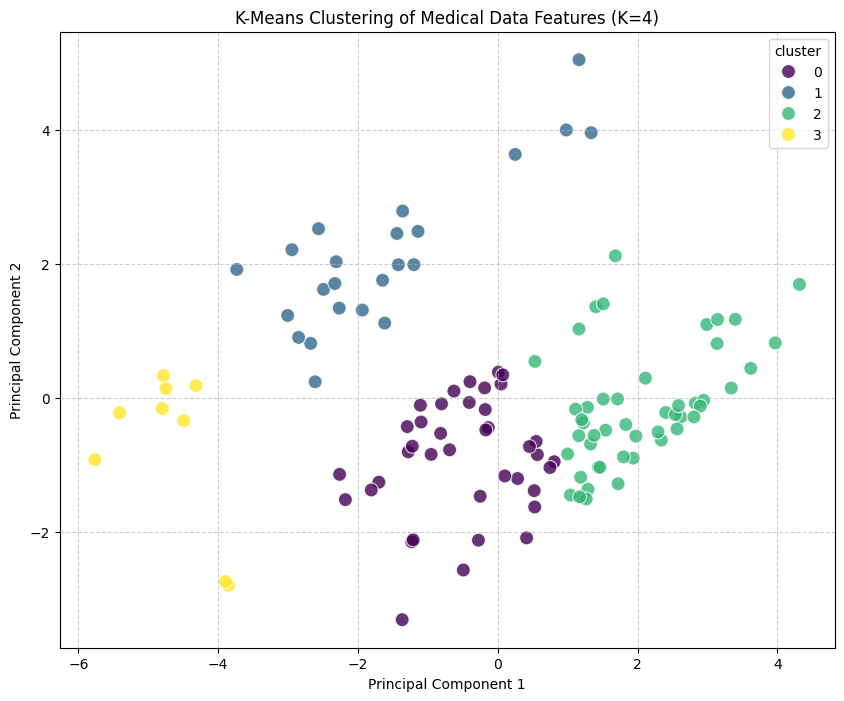

C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36605 (\N{CJK UNIFIED IDEOGRAPH-8EFD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24739 (\N{CJK UNIFIED IDEOGRAPH-60A3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER

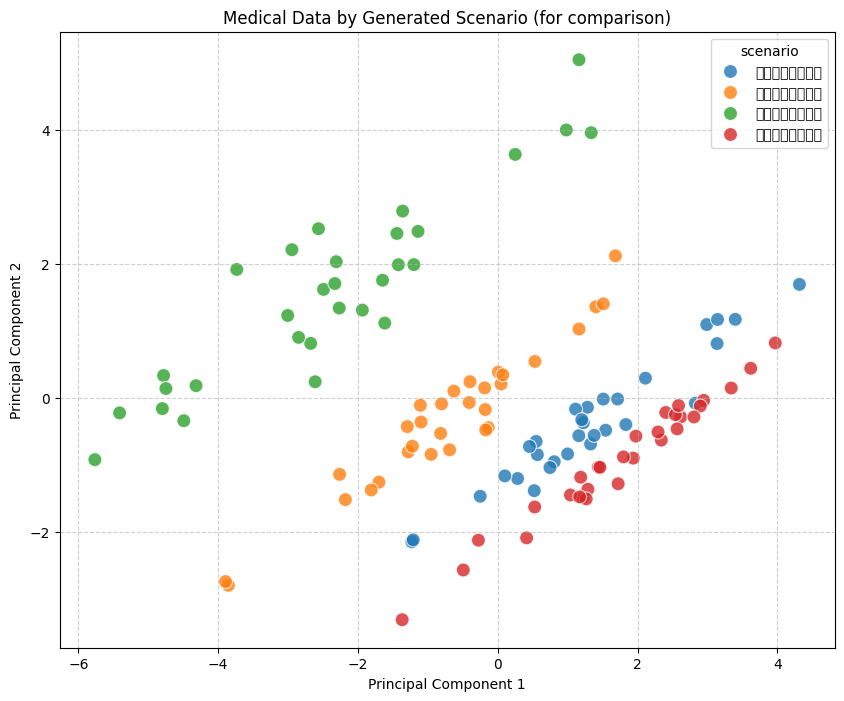

--- クラスタリングの注意点 ---
1. **K値の選択**: K-meansではK（クラスタ数）を事前に指定する必要があります。エルボー法やシルエットスコア、ドメイン知識を基に最適なKを見つける必要があります。
2. **特徴量のスケーリング**: 数値データとGPT特徴量のスケールが異なる場合、スケーリング（StandardScalerなど）が非常に重要です。そうしないと、スケールの大きい特徴量がクラスタリングに支配的になる可能性があります。
3. **高次元データ**: GPT特徴量は高次元です。高次元データでのクラスタリングは、直感的な解釈が難しくなることがあります（次元の呪い）。
4. **初期値依存性**: K-meansは初期値に依存するため、`n_init`で複数回実行し、最も良い結果を採用することが推奨されます。
5. **GANの概念との関連**: クラスタリング自体はGANとは直接関係ありません。GANはデータの生成や判別を目的としますが、クラスタリングは既存データの構造発見を目的とします。


In [26]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# GPUが利用可能かチェック
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用デバイス: {device}")

# NLTK 'punkt' tokenizerをダウンロード（初回のみ必要）
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # LookupErrorはリソースが見つからない場合のエラー
    print("NLTK 'punkt' tokenizer data not found. Downloading now...")
    nltk.download('punkt')
    print("ダウンロードが完了しました。")
except Exception as e: # その他の予期せぬエラー
    print(f"NLTKダウンロードチェック中に予期せぬエラーが発生しました: {e}")
    print("問題が解決しない場合は、手動で `nltk.download('punkt')` を実行してみてください。")


# --- 1. 医療系シミュレーションデータの生成 ---
# クラスタリングに適した特性を持たせるため、いくつかの「シナリオ」を想定してデータを生成
# 例: "軽度患者グループ", "中度患者グループ", "重度患者グループ", "予防重視グループ"
num_samples_per_scenario = 30
total_samples = num_samples_per_scenario * 4

# シナリオに基づくテキストと数値データの生成関数
def generate_medical_data():
    data = []
    scenarios = {
        "軽度患者グループ": {
            "news_keywords": ["軽症患者", "回復期", "外来診療", "自宅療養", "回復傾向", "減少傾向"],
            "icu_occupancy_mean": 0.15, "icu_occupancy_std": 0.05,
            "cases_mean": 50, "cases_std": 20,
            "vacc_rate_mean": 0.80, "vacc_rate_std": 0.05
        },
        "中度患者グループ": {
            "news_keywords": ["中等症", "病床ひっ迫", "入院増加", "医療提供体制", "警戒必要", "増加傾向"],
            "icu_occupancy_mean": 0.50, "icu_occupancy_std": 0.10,
            "cases_mean": 500, "cases_std": 150,
            "vacc_rate_mean": 0.65, "vacc_rate_std": 0.08
        },
        "重度患者グループ": {
            "news_keywords": ["重症患者", "ICU満床", "医療崩壊", "緊急事態", "急増", "ピーク"],
            "icu_occupancy_mean": 0.90, "icu_occupancy_std": 0.05,
            "cases_mean": 2000, "cases_std": 500,
            "vacc_rate_mean": 0.40, "vacc_rate_std": 0.10
        },
        "予防重視グループ": {
            "news_keywords": ["感染対策", "検査拡充", "早期発見", "経済活動", "社会活動", "クラスター対策"],
            "icu_occupancy_mean": 0.05, "icu_occupancy_std": 0.02,
            "cases_mean": 20, "cases_std": 10,
            "vacc_rate_mean": 0.90, "vacc_rate_std": 0.03
        }
    }

    report_id = 1
    for scenario_name, params in scenarios.items():
        for _ in range(num_samples_per_scenario):
            selected_keywords = np.random.choice(params["news_keywords"], 3, replace=False)
            # 修正: f-stringのフォーマット指定子の誤用を修正
            news_intro = np.random.choice(['今日の状況は', '最新情報', '報告', '現場から'])
            news_text = f"{news_intro}: 医療機関では{'、'.join(selected_keywords)}が見られます。"

            icu_rate = np.random.normal(params["icu_occupancy_mean"], params["icu_occupancy_std"])
            icu_rate = np.clip(icu_rate, 0.01, 0.99) # 0から1の範囲にクリップ
            cases = int(np.random.normal(params["cases_mean"], params["cases_std"]))
            cases = max(1, cases) # 少なくとも1人

            vacc_rate = np.random.normal(params["vacc_rate_mean"], params["vacc_rate_std"])
            vacc_rate = np.clip(vacc_rate, 0.01, 0.99) # 0から1の範囲にクリップ

            data.append({
                "report_id": report_id,
                "scenario": scenario_name, # クラスタの正解ラベルとして利用（評価用）
                "region": np.random.choice(["Tokyo", "Osaka", "Fukuoka", "Sapporo"]),
                "date": f"2024-{np.random.randint(1, 12):02d}-{np.random.randint(1, 28):02d}",
                "news_text": news_text,
                "cases_today": cases,
                "icu_occupancy_rate": icu_rate,
                "vaccination_rate_prev_week": vacc_rate
            })
            report_id += 1
    return pd.DataFrame(data)

df = generate_medical_data()
print("--- 生成された医療系データ (一部) ---")
print(df.head())
print(df['scenario'].value_counts()) # 各シナリオのデータ数を確認
print("//n" + "="*80 + "//n")

# GPTモデルへの入力テキストを生成する関数 (前回同様)
def create_text_for_embedding(row):
    region_text = row['region']
    date_text = row['date']
    news_text = row['news_text']
    cases = row['cases_today']
    icu_rate = int(row['icu_occupancy_rate'] * 100)
    vacc_rate = int(row['vaccination_rate_prev_week'] * 100)

    combined_text = (
        f"医療報告: {news_text}。//n"
        f"現在の状況データ: 地域は{region_text}、日付は{date_text}、"
        f"新規感染者数は{cases}人、"
        f"ICU病床使用率は{icu_rate}%、"
        f"先週のワクチン接種率は{vacc_rate}%です。"
    )
    return combined_text

texts_to_embed = [create_text_for_embedding(row) for index, row in df.iterrows()]

# --- 2. GPTモデルとトークナイザーのロードと特徴量抽出 ---
model_name = "gpt2" # 特徴量抽出にはAutoModelForCausalLMでも十分
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True)
model.to(device)
model.eval()

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = model.config.eos_token_id

print(f"--- モデル '{model_name}' をロードし、特徴量抽出を開始します ---")

batch_size = 8 # 適切なバッチサイズに調整
all_extracted_features = []

with torch.no_grad():
    for i in range(0, len(texts_to_embed), batch_size):
        batch_texts = texts_to_embed[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding='longest', truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        outputs = model(**inputs)
        
        # 最終層の隠れ状態（埋め込み）を取得
        final_layer_embeddings = outputs.hidden_states[-1]

        # 各シーケンスの埋め込みを平均プーリングして集約
        for j in range(final_layer_embeddings.shape[0]):
            valid_tokens_mask = inputs['attention_mask'][j].bool()
            valid_embeddings = final_layer_embeddings[j, valid_tokens_mask]
            if valid_embeddings.numel() > 0:
                sequence_feature = torch.mean(valid_embeddings, dim=0)
            else:
                sequence_feature = torch.zeros(final_layer_embeddings.shape[-1], device=device)
            all_extracted_features.append(sequence_feature.cpu().numpy()) # CPUに戻してNumPy配列に変換

gpt_features = np.array(all_extracted_features)
print(f"GPTから抽出された特徴量の形状: {gpt_features.shape}")
print("//n" + "="*80 + "//n")

# --- 3. 数値特徴量の準備と結合 ---
# GPT特徴量と数値データを組み合わせてクラスタリングを行う
numerical_features = df[['cases_today', 'icu_occupancy_rate', 'vaccination_rate_prev_week']].values

# 数値特徴量をスケーリング (MinMaxScalerやStandardScalerが推奨)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

print(f"スケーリングされた数値特徴量の形状: {numerical_features_scaled.shape}")

# GPT特徴量と数値特徴量を結合
# この結合方法は、それぞれの特徴量の重要度やスケールによって調整が必要です
# 例: np.hstack, または加重平均など
combined_features = np.hstack((gpt_features, numerical_features_scaled))
print(f"結合された特徴量の形状: {combined_features.shape}")
print("//n" + "="*80 + "//n")


# --- 4. 次元削減 (可視化のためにPCAを使用) ---
# クラスタリングは高次元データでも可能ですが、可視化のために2次元に削減します。
# 実際のクラスタリングは結合された特徴量(combined_features)に対して行います。
pca = PCA(n_components=2)
reduced_features_for_plot = pca.fit_transform(combined_features)

print(f"PCAで2次元に削減された特徴量の形状: {reduced_features_for_plot.shape}")
print("可視化のためにデータが削減されましたが、クラスタリングは元の結合特徴量で行われます。")
print("//n" + "="*80 + "//n")

# --- 5. クラスタリングの実行 (K-Means) ---
# 最適なK（クラスタ数）を見つけるためのエルボー法やシルエットスコア
# ここでは、データ生成時に4つのシナリオを想定したため、K=4を試します。
n_clusters = 4
print(f"K-Meansクラスタリングを開始します (クラスタ数 K={n_clusters})")

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_initで複数回初期化して良い結果を選択
clusters = kmeans.fit_predict(combined_features) # 結合された特徴量に対してクラスタリング

df['cluster'] = clusters # 結果をDataFrameに追加

print("--- K-Meansクラスタリング結果 (最初の10件) ---")
print(df[['scenario', 'cluster']].head(10))
print("//n" + "="*80 + "//n")

# --- 6. クラスタリング結果の評価 ---
# シルエットスコア: クラスタ内の凝集度とクラスタ間の分離度を測る指標 (-1から1、1に近いほど良い)
if n_clusters > 1 and n_clusters < len(combined_features): # クラスタ数が1より大きく、データ数より小さい場合にのみ計算可能
    silhouette_avg = silhouette_score(combined_features, clusters)
    print(f"シルエットスコア: {silhouette_avg:.4f}")
else:
    print("シルエットスコアは計算できません（クラスタ数が1以下またはデータ数以上です）。")

# クラスタと生成シナリオのマッピングを確認 (もし可能なら)
print("//n--- クラスタと生成シナリオのクロス集計 ---")
print(pd.crosstab(df['scenario'], df['cluster']))
print("//n" + "="*80 + "//n")

# --- 7. クラスタリング結果の可視化 ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features_for_plot[:, 0],
    y=reduced_features_for_plot[:, 1],
    hue=df['cluster'], # クラスタごとに色分け
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='w'
)
plt.title(f'K-Means Clustering of Medical Data Features (K={n_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# オプション: 生成シナリオとの比較可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features_for_plot[:, 0],
    y=reduced_features_for_plot[:, 1],
    hue=df['scenario'], # 生成シナリオごとに色分け
    palette='tab10',
    s=100,
    alpha=0.8,
    edgecolor='w'
)
plt.title('Medical Data by Generated Scenario (for comparison)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- クラスタリングの注意点 ---")
print("1. **K値の選択**: K-meansではK（クラスタ数）を事前に指定する必要があります。エルボー法やシルエットスコア、ドメイン知識を基に最適なKを見つける必要があります。")
print("2. **特徴量のスケーリング**: 数値データとGPT特徴量のスケールが異なる場合、スケーリング（StandardScalerなど）が非常に重要です。そうしないと、スケールの大きい特徴量がクラスタリングに支配的になる可能性があります。")
print("3. **高次元データ**: GPT特徴量は高次元です。高次元データでのクラスタリングは、直感的な解釈が難しくなることがあります（次元の呪い）。")
print("4. **初期値依存性**: K-meansは初期値に依存するため、`n_init`で複数回実行し、最も良い結果を採用することが推奨されます。")
print("5. **GANの概念との関連**: クラスタリング自体はGANとは直接関係ありません。GANはデータの生成や判別を目的としますが、クラスタリングは既存データの構造発見を目的とします。")

In [32]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. サンプルデータ生成（医療系文章＋数値）
data = [
    {"text": "軽症患者が増えています。", "cases_today": 30, "icu_occupancy_rate": 0.12, "vaccination_rate_prev_week": 0.82},
    {"text": "重症患者が急増しICUが逼迫しています。", "cases_today": 1800, "icu_occupancy_rate": 0.95, "vaccination_rate_prev_week": 0.42},
    {"text": "感染対策が強化され新規感染者が減少傾向です。", "cases_today": 15, "icu_occupancy_rate": 0.05, "vaccination_rate_prev_week": 0.91},
    {"text": "中等症患者が増加し、医療提供体制に負荷がかかっています。", "cases_today": 600, "icu_occupancy_rate": 0.55, "vaccination_rate_prev_week": 0.66},
    # ... 必要に応じてデータを増やしてください
]
df = pd.DataFrame(data)

# 2. GPTモデルのロード
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2", output_hidden_states=True).to(device)
model.eval()
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = model.config.eos_token_id

# 3. 文章ごとに埋め込みベクトルを抽出
all_embeddings = []
with torch.no_grad():
    for text in df["text"]:
        inputs = tokenizer(text, return_tensors="pt", padding='longest', truncation=True).to(device)
        outputs = model(**inputs)
        final_layer = outputs.hidden_states[-1][0]  # [seq_len, hidden_size]
        mask = inputs["attention_mask"][0].bool()
        valid_embeds = final_layer[mask]
        if valid_embeds.shape[0] > 0:
            sent_vec = valid_embeds.mean(dim=0).cpu().numpy()
        else:
            sent_vec = np.zeros(final_layer.shape[1])
        all_embeddings.append(sent_vec)
gpt_features = np.array(all_embeddings)

# 4. 数値特徴量のスケーリング
num_features = df[["cases_today", "icu_occupancy_rate", "vaccination_rate_prev_week"]].values
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features)

# 5. 特徴量の結合
combined_features = np.hstack([gpt_features, num_features_scaled])
print(combined_features)

# 6. KMeansクラスタリング
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(combined_features)
df["cluster"] = clusters

# 7. クラスタリング評価
if n_clusters > 1 and n_clusters < len(combined_features):
    sil_score = silhouette_score(combined_features, clusters)
    print(f"シルエットスコア: {sil_score:.4f}")

# 8. 結果表示
print(df[["text", "cases_today", "icu_occupancy_rate", "vaccination_rate_prev_week", "cluster"]])


C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


[[-0.15617281 -0.3918131  -0.3983798  ... -0.80094001 -0.82143231
   0.63151283]
 [ 0.03036138 -0.4784579  -0.35072181 ...  1.6380515   1.4702948
  -1.51831807]
 [-0.25360656 -0.17304006 -0.28822768 ... -0.82160943 -1.0147105
   1.11522478]
 [-0.1251184  -0.35899773 -0.31310076 ... -0.01550206  0.365848
  -0.22841953]]
シルエットスコア: 0.0882
                           text  cases_today  icu_occupancy_rate  \
0                  軽症患者が増えています。           30                0.12   
1          重症患者が急増しICUが逼迫しています。         1800                0.95   
2        感染対策が強化され新規感染者が減少傾向です。           15                0.05   
3  中等症患者が増加し、医療提供体制に負荷がかかっています。          600                0.55   

   vaccination_rate_prev_week  cluster  
0                        0.82        2  
1                        0.42        0  
2                        0.91        1  
3                        0.66        1  


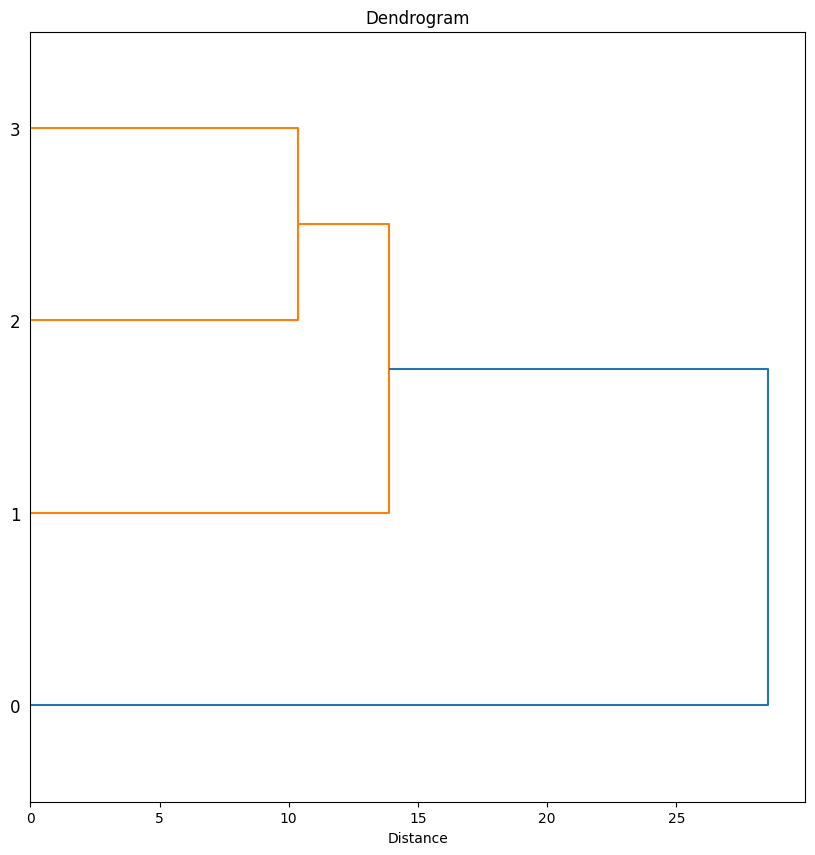

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 例：combined_featuresは前処理済みの特徴量
Z = linkage(combined_features, method='ward', metric='euclidean')
plt.figure(figsize=(10, 10))
dend = dendrogram(Z, orientation='right', labels=range(len(combined_features)))
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.show()


In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 仮想：ASTから特徴ベクトルを抽出する関数（例：ノードタイプ数、深さ、子孫数など）
def extract_features(ast):
    # ここでASTを走査し、特徴量を抽出
    features = [
        count_node_types(ast, ['FunctionDef', 'ClassDef']),  # 関数定義・クラス定義の数
        get_max_depth(ast),                                  # 最大深さ
        count_descendants(ast),                              # 子孫ノード数
    ]
    return np.array(features)

# 仮想データ
asts = [ast1, ast2, ast3, ...]  # ASTオブジェクトのリスト
labels = [0, 1, 0, ...]         # 各ASTの分類ラベル

# 特徴抽出
X = np.array([extract_features(ast) for ast in asts])
y = np.array(labels)

# 分類モデルの学習
clf = RandomForestClassifier()
clf.fit(X, y)

# 推論
test_ast = ...  # 新しいAST
test_feature = extract_features(test_ast)
pred = clf.predict([test_feature])
print(pred)


NameError: name 'ast1' is not defined

In [44]:
# 疑似コード（実際はPyTorchやTFでTree-LSTMを実装）
from some_tree_lstm import TreeLSTM

model = TreeLSTM(input_size=100, hidden_size=64)
# ASTをモデルに入力し、ベクトル化
ast_vectors = [model(ast) for ast in asts]
# ast_vectorsを使って類似度計算や分類モデルを構築


ModuleNotFoundError: No module named 'some_tree_lstm'

In [46]:
import numpy as np
import pandas as pd

# 大量の浮動小数点数（正規分布）
num_samples = 1_000_000 # 100万件
num_features = 10     # 10次元の特徴量
random_data_gaussian = np.random.randn(num_samples, num_features) # 標準正規分布

print("正規分布に基づくランダムデータ形状:", random_data_gaussian.shape)
print("最初の5行://n", random_data_gaussian[:5])

# 大量の整数（一様分布）
min_val = 0
max_val = 1000
random_data_uniform_int = np.random.randint(min_val, max_val, size=(num_samples, num_features))

print("//n一様分布に基づくランダム整数データ形状:", random_data_uniform_int.shape)
print("最初の5行://n", random_data_uniform_int[:5])

# pandas DataFrameとして保存
df_gaussian = pd.DataFrame(random_data_gaussian, columns=[f'feature_{i}' for i in range(num_features)])
df_uniform_int = pd.DataFrame(random_data_uniform_int, columns=[f'feature_{i}' for i in range(num_features)])

# CSVとして保存 (例)
# df_gaussian.to_csv("random_gaussian_data.csv", index=False)
# df_uniform_int.to_csv("random_uniform_int_data.csv", index=False)

正規分布に基づくランダムデータ形状: (1000000, 10)
最初の5行:
 [[ 1.24960189  1.11121598  1.93320009 -1.74418857 -1.82332397  0.69721405
   1.83389855 -0.77294851 -0.2147808   1.30332683]
 [ 1.90301256  1.01219172  0.58400143 -1.49650726  0.52959744 -0.74433098
  -1.86115241 -1.66017916  1.85247054 -0.67628675]
 [ 1.41375283 -0.40500578  0.33758681  0.08797442 -1.44329013 -0.95236855
  -0.45374732  0.34061012  0.55251617 -0.27231846]
 [ 1.47514677 -0.78100233 -0.9998299  -1.84521938 -1.20752281  1.10238666
  -0.29598814 -0.60534886 -0.9505374  -0.45461369]
 [-0.61632196 -1.4168184  -0.23709309  0.36018484 -0.08147815  0.33975437
   0.07489629 -1.86038967 -0.48229706  0.84025213]]

一様分布に基づくランダム整数データ形状: (1000000, 10)
最初の5行:
 [[483 161 134 430 663  16 105 568 745 179]
 [757 844 505 708 127 868 136 334 162 890]
 [655 148 802 608 731 831 517 275 285 310]
 [925 951 652 887 985 195 515 287 997 416]
 [932 472 739 366 233 128 421 608 546 172]]


In [52]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta

fake = Faker('ja_JP')

def generate_random_medical_data(num_records):
    data = []
    diagnoses = ["高血圧", "糖尿病", "風邪", "胃腸炎", "気管支炎", "アレルギー性鼻炎", "インフルエンザ", "骨折"]
    medications = ["ロキソニン", "アムロジピン", "メトホルミン", "セフジニル", "モンテルカスト", "タミフル"]

    start_date = datetime(2023, 1, 1)
    end_date = datetime(2024, 12, 31)

    for i in range(num_records):
        patient_id = f"PAT_{i:07d}"
        gender = random.choice(['男性', '女性'])
        age = random.randint(18, 90)
        
        # 診断名と処方薬は複数選択の可能性も
        num_diagnoses = random.randint(1, 3)
        current_diagnoses = random.sample(diagnoses, num_diagnoses)

        num_medications = random.randint(0, 2)
        current_medications = random.sample(medications, num_medications)

        # 検査結果 (正規分布を仮定)
        temperature = round(np.random.normal(36.8, 0.5), 1)
        blood_pressure_systolic = int(np.random.normal(120, 15))
        blood_pressure_diastolic = int(np.random.normal(80, 10))
        blood_glucose = int(np.random.normal(100, 20)) # mg/dL

        # 日付
        visit_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        
        # 医療テキスト（Fakerでそれっぽい文章を生成）
        # 例：患者の症状、医師の所見など
        medical_note = fake.text(max_nb_chars=200) + " 患者は" + random.choice(["安定", "改善", "横ばい", "悪化"]) + "傾向。"
        
        data.append({
            "patient_id": patient_id,
            "gender": gender,
            "age": age,
            "visit_date": visit_date.strftime('%Y-%m-%d'),
            "diagnoses": ", ".join(current_diagnoses),
            "medications": ", ".join(current_medications),
            "temperature": temperature,
            "blood_pressure_systolic": blood_pressure_systolic,
            "blood_pressure_diastolic": blood_pressure_diastolic,
            "blood_glucose": blood_glucose,
            "medical_note": medical_note
        })
    return pd.DataFrame(data)

# 10万件のランダムな医療データを生成
large_medical_df = generate_random_medical_data(100_000)

print("//n生成されたランダムな医療データセットのヘッド:")
print(large_medical_df.head())
print("//nデータセットの統計情報:")
print(large_medical_df.info())
print("//n年齢の分布:")
print(large_medical_df['age'].describe())

# CSVとして保存することも可能
# large_medical_df.to_csv("large_random_medical_data.csv", index=False, encoding='utf-8-sig')


生成されたランダムな医療データセットのヘッド:
    patient_id gender  age  visit_date          diagnoses medications  \
0  PAT_0000000     男性   66  2023-06-01                糖尿病               
1  PAT_0000001     女性   25  2024-01-22  胃腸炎, アレルギー性鼻炎, 骨折       ロキソニン   
2  PAT_0000002     男性   85  2023-04-22        インフルエンザ, 骨折        タミフル   
3  PAT_0000003     男性   67  2024-12-11           高血圧, 糖尿病     モンテルカスト   
4  PAT_0000004     女性   52  2023-01-15                 骨折               

   temperature  blood_pressure_systolic  blood_pressure_diastolic  \
0         37.3                      112                        84   
1         36.7                      100                        96   
2         36.6                      113                        82   
3         37.4                      134                        97   
4         36.0                      127                        91   

   blood_glucose                                       medical_note  
0            110  怒り午前ノート。高い合計賞賛する目的コピーハンマー。細かいホイール

Dataset generated. Train: (800, 1, 28, 28), Test: (200, 1, 28, 28)
Train labels (one-hot): (800, 2), Test labels (one-hot): (200, 2)


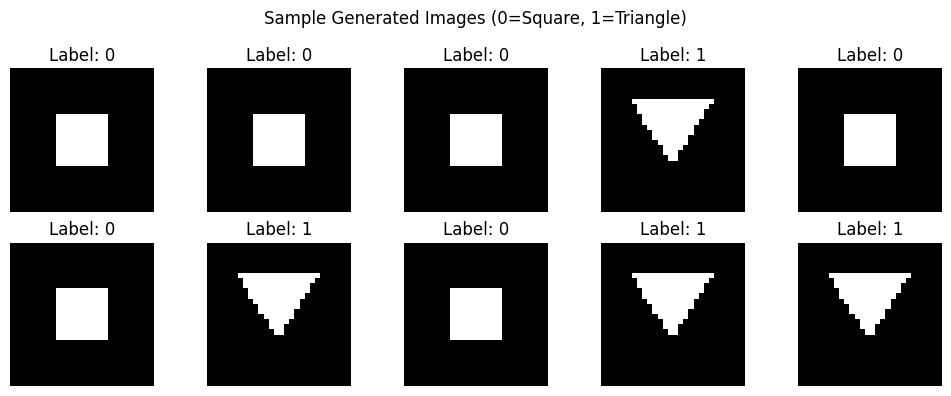

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import random # 乱数生成
def create_square(size=28, center_size=10):
    img = np.zeros((size, size), dtype=np.float32)
    start = (size - center_size) // 2
    end = start + center_size
    img[start:end, start:end] = 1.0 # 白い四角
    return img

def create_triangle(size=28, base_size=16, height_ratio=0.8):
    img = np.zeros((size, size), dtype=np.float32)
    
    # ピラミッド型に白を塗る
    base_start = (size - base_size) // 2
    for i in range(int(base_size * height_ratio)):
        line_width = int(base_size * (1 - i / (base_size * height_ratio))) # 頂点に向かって細くなる
        line_start = (size - line_width) // 2
        img[base_start + i, line_start : line_start + line_width] = 1.0
    return img

def generate_dataset(num_samples_per_class=500, img_size=28):
    images = []
    labels = [] # 0 for square, 1 for triangle

    for _ in range(num_samples_per_class):
        images.append(create_square(img_size))
        labels.append(0) # Label for square

    for _ in range(num_samples_per_class):
        images.append(create_triangle(img_size))
        labels.append(1) # Label for triangle
    
    images = np.array(images).reshape(-1, 1, img_size, img_size) # (N, C, H, W)形式
    labels = np.array(labels)

    # データをシャッフル
    p = np.random.permutation(len(images))
    images = images[p]
    labels = labels[p]

    # トレーニングとテストに分割
    split_ratio = 0.8
    split_idx = int(len(images) * split_ratio)

    X_train = images[:split_idx]
    y_train = labels[:split_idx]
    X_test = images[split_idx:]
    y_test = labels[split_idx:]

    # ラベルをOne-Hotエンコーディング
    y_train_onehot = np.eye(2)[y_train] # 2クラス分類
    y_test_onehot = np.eye(2)[y_test]

    print(f"Dataset generated. Train: {X_train.shape}, Test: {X_test.shape}")
    print(f"Train labels (one-hot): {y_train_onehot.shape}, Test labels (one-hot): {y_test_onehot.shape}")
    
    return X_train, y_train_onehot, X_test, y_test_onehot, y_train, y_test

# データセット生成
IMG_SIZE = 28
X_train, y_train_onehot, X_test, y_test_onehot, y_train_raw, y_test_raw = generate_dataset(img_size=IMG_SIZE)

# 生成された画像をいくつか表示して確認
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.title(f"Label: {y_train_raw[i]}")
    plt.axis('off')
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_train[i + 100, 0], cmap='gray') # 別の画像
    plt.title(f"Label: {y_train_raw[i + 100]}")
    plt.axis('off')
plt.suptitle("Sample Generated Images (0=Square, 1=Triangle)")
plt.tight_layout()
plt.show()

In [64]:
class Conv2D:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

        # Xavier Initialization
        limit = np.sqrt(6 / (in_channels * kernel_size**2 + out_channels * kernel_size**2))
        self.weights = np.random.uniform(-limit, limit, (out_channels, in_channels, kernel_size, kernel_size))
        self.biases = np.zeros((out_channels, 1)) # 各出力チャンネルに1つのバイアス

        self.X = None # 入力データ (逆伝播用)
        self.padded_X = None # パディング後の入力 (逆伝播用)

    def forward(self, X):
        # X shape: (N, C_in, H_in, W_in)
        # Weights shape: (C_out, C_in, K_H, K_W)
        N, C_in, H_in, W_in = X.shape
        C_out, _, K_H, K_W = self.weights.shape

        H_out = (H_in + 2 * self.padding - K_H) // self.stride + 1
        W_out = (W_in + 2 * self.padding - K_W) // self.stride + 1

        self.X = X
        
        # パディング
        if self.padding > 0:
            padded_X = np.pad(X, ((0,0), (0,0), (self.padding, self.padding), (self.padding, self.padding)), mode='constant')
        else:
            padded_X = X
        self.padded_X = padded_X # 逆伝播用に保存

        output = np.zeros((N, C_out, H_out, W_out))

        for n in range(N):
            for c_out in range(C_out):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        h_start = h_out * self.stride
                        w_start = w_out * self.stride
                        h_end = h_start + K_H
                        w_end = w_start + K_W
                        
                        # 畳み込み演算
                        receptive_field = padded_X[n, :, h_start:h_end, w_start:w_end]
                        output[n, c_out, h_out, w_out] = np.sum(receptive_field * self.weights[c_out, :, :, :]) + self.biases[c_out]
        return output

    def backward(self, grad_output):
        N, C_out, H_out, W_out = grad_output.shape
        C_in = self.in_channels
        K_H, K_W = self.kernel_size, self.kernel_size

        # パディング考慮前の入力形状
        _, _, H_in, W_in = self.X.shape

        # 勾配の初期化
        grad_weights = np.zeros_like(self.weights)
        grad_biases = np.sum(grad_output, axis=(0, 2, 3)).reshape(C_out, 1) # 各出力チャンネルのバイアスの勾配
        grad_X = np.zeros_like(self.padded_X) # パディング考慮後の入力の勾配

        for n in range(N):
            for c_out in range(C_out):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        h_start = h_out * self.stride
                        w_start = w_out * self.stride
                        h_end = h_start + K_H
                        w_end = w_start + K_W

                        # 重みの勾配 (dL/dW = X * dL/dY)
                        grad_weights[c_out, :, :, :] += self.padded_X[n, :, h_start:h_end, w_start:w_end] * grad_output[n, c_out, h_out, w_out]
                        
                        # 入力の勾配 (dL/dX = W * dL/dY)
                        grad_X[n, :, h_start:h_end, w_start:w_end] += self.weights[c_out, :, :, :] * grad_output[n, c_out, h_out, w_out]

        # パディング部分の勾配を除去して、元の入力の勾配を得る
        if self.padding > 0:
            grad_X = grad_X[:, :, self.padding:self.padding+H_in, self.padding:self.padding+W_in]
        
        return grad_weights, grad_biases, grad_X


class ReLU:
    def __init__(self):
        self.X = None # 入力 (逆伝播用)

    def forward(self, X):
        self.X = X
        return np.maximum(0, X)

    def backward(self, grad_output):
        grad_X = grad_output.copy()
        grad_X[self.X <= 0] = 0 # ReLUの導関数: x>0なら1, x<=0なら0
        return grad_X

class MaxPooling:
    def __init__(self, pool_size, stride):
        self.pool_size = pool_size
        self.stride = stride
        self.X = None # 入力 (逆伝播用)
        self.mask = None # 最大値の位置を保存するマスク (逆伝播用)

    def forward(self, X):
        N, C, H_in, W_in = X.shape
        P_H, P_W = self.pool_size, self.pool_size
        
        H_out = (H_in - P_H) // self.stride + 1
        W_out = (W_in - P_W) // self.stride + 1
        
        output = np.zeros((N, C, H_out, W_out))
        self.mask = np.zeros_like(X) # 最大値の位置を記憶するマスク

        self.X = X # 逆伝播用に保存

        for n in range(N):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        h_start = h_out * self.stride
                        w_start = w_out * self.stride
                        h_end = h_start + P_H
                        w_end = w_start + P_W
                        
                        window = X[n, c, h_start:h_end, w_start:w_end]
                        max_val = np.max(window)
                        output[n, c, h_out, w_out] = max_val
                        
                        # 逆伝播用に最大値のインデックスを保存 (マスク)
                        # 同じ最大値がある場合は最初の位置を選ぶ
                        max_idx_h, max_idx_w = np.unravel_index(np.argmax(window), window.shape)
                        self.mask[n, c, h_start + max_idx_h, w_start + max_idx_w] = 1

        return output

    def backward(self, grad_output):
        grad_X = np.zeros_like(self.X)
        N, C, H_out, W_out = grad_output.shape
        P_H, P_W = self.pool_size, self.pool_size

        for n in range(N):
            for c in range(C):
                for h_out in range(H_out):
                    for w_out in range(W_out):
                        h_start = h_out * self.stride
                        w_start = w_out * self.stride
                        h_end = h_start + P_H
                        w_end = w_start + P_W
                        
                        # grad_output の値を最大値があった位置にのみ伝播
                        grad_X[n, c, h_start:h_end, w_start:w_end] += //
                            self.mask[n, c, h_start:h_end, w_start:w_end] * grad_output[n, c, h_out, w_out]
        return grad_X

class Flatten:
    def __init__(self):
        self.original_shape = None # 入力形状 (逆伝播用)

    def forward(self, X):
        self.original_shape = X.shape
        return X.reshape(self.original_shape[0], -1) # バッチサイズは維持し、それ以外を平坦化

    def backward(self, grad_output):
        return grad_output.reshape(self.original_shape)

class Dense:
    def __init__(self, input_size, output_size):
        # Xavier Initialization (Glorot uniform)
        limit = np.sqrt(6 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.biases = np.zeros((1, output_size))

        self.X = None # 入力 (逆伝播用)

    def forward(self, X):
        self.X = X
        return np.dot(X, self.weights) + self.biases

    def backward(self, grad_output):
        # grad_output: (N, output_size)
        # self.X: (N, input_size)
        # self.weights: (input_size, output_size)

        grad_weights = np.dot(self.X.T, grad_output) # dL/dW = X.T * dL/dY
        grad_biases = np.sum(grad_output, axis=0, keepdims=True) # dL/db = sum(dL/dY)
        grad_X = np.dot(grad_output, self.weights.T) # dL/dX = dL/dY * W.T
        return grad_weights, grad_biases, grad_X

class Softmax:
    def __init__(self):
        self.output = None # 順伝播の出力 (逆伝播用)

    def forward(self, X):
        # 数値オーバーフロー対策 (exp(X - max(X)))
        exp_X = np.exp(X - np.max(X, axis=-1, keepdims=True))
        self.output = exp_X / np.sum(exp_X, axis=-1, keepdims=True)
        return self.output

    def backward(self, grad_output):
        # Softmaxの逆伝播は少し複雑
        # dL/dX = dL/dY * dY/dX
        # dY/dX はヤコビアン行列になる
        # dY_j / dX_i = y_j * (delta_ij - y_i)
        # ここでは簡略化された交差エントロピー損失との組み合わせを想定
        # (y_pred - y_true) が直接 grad_output に入るケースを考える
        return grad_output # 交差エントロピー損失と組み合わせた場合の勾配


# 注意: Softmax と CrossEntropyLoss の組み合わせは、
# backward時に (y_pred - y_true) となるため、Softmax層自体の複雑なヤコビアン計算は不要になることが多い。
# ここでは、簡略化のため、Softmaxのbackwardは入力をそのまま返す（直後に交差エントロピー損失がある場合）。
# 厳密なSoftmax単独のbackwardは複雑で、ヤコビアン行列が必要になる。
# 実際には、SoftmaxWithLossという形で一つの層として扱うことが多い。

In [66]:
class CrossEntropyLoss:
    def __init__(self):
        self.y_pred = None
        self.y_true = None

    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        # 数値安定化のため、小さい値を加える
        epsilon = 1e-10
        loss = -np.sum(y_true * np.log(y_pred + epsilon)) / y_true.shape[0]
        return loss

    def backward(self):
        # Softmax と CrossEntropyLoss の組み合わせの場合の勾配
        # dL/dY_pred = (y_pred - y_true) / N
        grad_output = (self.y_pred - self.y_true) / self.y_true.shape[0]
        return grad_output

class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def step(self, layer, grad_weights, grad_biases):
        # 簡易的なSGD
        layer.weights -= self.learning_rate * grad_weights
        layer.biases -= self.learning_rate * grad_biases

In [68]:
class SimpleCNN:
    def __init__(self, input_shape, num_classes):
        # input_shape: (C, H, W)
        C_in, H_in, W_in = input_shape

        # 各層のインスタンス化
        self.conv1 = Conv2D(in_channels=C_in, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu1 = ReLU()
        self.pool1 = MaxPooling(pool_size=2, stride=2)

        # 畳み込み後の出力形状を計算 (全結合層の入力サイズを決定するため)
        # 仮の順伝播で形状を確認するのが確実
        # (N, C, H, W) -> (1, C, H, W) として計算
        dummy_input = np.zeros((1, C_in, H_in, W_in))
        
        dummy_output = self.conv1.forward(dummy_input)
        dummy_output = self.relu1.forward(dummy_output)
        dummy_output = self.pool1.forward(dummy_output)
        
        flatten_input_size = dummy_output.shape[1] * dummy_output.shape[2] * dummy_output.shape[3]

        self.flatten = Flatten()
        self.fc1 = Dense(input_size=flatten_input_size, output_size=64)
        self.relu2 = ReLU()
        self.fc2 = Dense(input_size=64, output_size=num_classes)
        self.softmax = Softmax()

        self.loss_fn = CrossEntropyLoss()
        self.optimizer = Optimizer(learning_rate=0.001) # 学習率を調整

        # 学習可能な層をリストアップ
        self.trainable_layers = [self.conv1, self.fc1, self.fc2]
        self.layers = [self.conv1, self.relu1, self.pool1, self.flatten, self.fc1, self.relu2, self.fc2, self.softmax]

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, y_true):
        # 損失の勾配から逆伝播を開始
        grad = self.loss_fn.backward()

        # 各層を逆順に処理
        # Softmaxは損失関数と結合しているため、loss_fn.backward()がSoftmaxの出力に関する勾配を直接提供すると考える
        # または、Softmax.backward(grad) -> grad_from_softmax
        # この実装ではSoftmaxのbackwardが grad をそのまま返すので、ループを回す
        
        # 厳密には、Softmax層のbackwardは`grad_output`を受け取り、その入力に関する勾配を返す
        # self.layers は softmax も含むので、そこから遡る
        
        # 最後のfc2の勾配
        grad_W_fc2, grad_b_fc2, grad = self.fc2.backward(grad)
        
        # relu2の勾配
        grad = self.relu2.backward(grad)

        # fc1の勾配
        grad_W_fc1, grad_b_fc1, grad = self.fc1.backward(grad)

        # flattenの勾配
        grad = self.flatten.backward(grad)

        # pool1の勾配
        grad = self.pool1.backward(grad)

        # relu1の勾配
        grad = self.relu1.backward(grad)

        # conv1の勾配
        grad_W_conv1, grad_b_conv1, grad_input = self.conv1.backward(grad) # grad_inputは不要だが戻り値としてある

        # パラメータの更新
        self.optimizer.step(self.conv1, grad_W_conv1, grad_b_conv1)
        self.optimizer.step(self.fc1, grad_W_fc1, grad_b_fc1)
        self.optimizer.step(self.fc2, grad_W_fc2, grad_b_fc2)


    def train(self, X_train, y_train_onehot, epochs, batch_size):
        num_samples = X_train.shape[0]
        num_batches = num_samples // batch_size

        for epoch in range(epochs):
            total_loss = 0
            correct_predictions = 0
            
            # データをシャッフル
            p = np.random.permutation(num_samples)
            X_train_shuffled = X_train[p]
            y_train_onehot_shuffled = y_train_onehot[p]

            for i in range(num_batches):
                X_batch = X_train_shuffled[i * batch_size : (i + 1) * batch_size]
                y_batch_onehot = y_train_onehot_shuffled[i * batch_size : (i + 1) * batch_size]

                # 順伝播
                y_pred = self.forward(X_batch)

                # 損失計算
                loss = self.loss_fn.forward(y_pred, y_batch_onehot)
                total_loss += loss

                # 逆伝播とパラメータ更新
                self.backward(y_batch_onehot)

                # 精度計算
                predictions = np.argmax(y_pred, axis=1)
                true_labels = np.argmax(y_batch_onehot, axis=1)
                correct_predictions += np.sum(predictions == true_labels)

            avg_loss = total_loss / num_batches
            accuracy = correct_predictions / (num_batches * batch_size)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

    def evaluate(self, X_test, y_test_onehot):
        y_pred = self.forward(X_test)
        loss = self.loss_fn.forward(y_pred, y_test_onehot)
        
        predictions = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_test_onehot, axis=1)
        
        accuracy = np.mean(predictions == true_labels)
        print(f"//nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
        return accuracy, predictions, true_labels

# モデルのインスタンス化と学習
input_shape = (1, IMG_SIZE, IMG_SIZE) # (channels, height, width)
num_classes = 2 # 四角形と三角形

model = SimpleCNN(input_shape, num_classes)

epochs = 20
batch_size = 16

print("//n--- Training Started ---")
model.train(X_train, y_train_onehot, epochs, batch_size)
print("--- Training Finished ---")

# モデルの評価
accuracy, predictions, true_labels = model.evaluate(X_test, y_test_onehot)

# 誤分類された画像をいくつか表示
misclassified_indices = np.where(predictions != true_labels)[0]
if len(misclassified_indices) > 0:
    print("//n--- Misclassified Samples ---")
    plt.figure(figsize=(10, min(2, len(misclassified_indices)) * 4))
    for i, idx in enumerate(misclassified_indices[:min(10, len(misclassified_indices))]): # 最大10枚表示
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[idx, 0], cmap='gray')
        plt.title(f"True: {true_labels[idx]}, Pred: {predictions[idx]}")
        plt.axis('off')
    plt.suptitle("Misclassified Images (0=Square, 1=Triangle)")
    plt.tight_layout()
    plt.show()
else:
    print("//nNo misclassified samples found!")

C:\Users\workt\AppData\Local\Temp\ipykernel_8216\2647138540.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output[n, c_out, h_out, w_out] = np.sum(receptive_field * self.weights[c_out, :, :, :]) + self.biases[c_out]



--- Training Started ---
Epoch 1/20, Loss: 0.5525, Accuracy: 0.9600
Epoch 2/20, Loss: 0.4010, Accuracy: 1.0000
Epoch 3/20, Loss: 0.3000, Accuracy: 1.0000
Epoch 4/20, Loss: 0.2274, Accuracy: 1.0000
Epoch 5/20, Loss: 0.1753, Accuracy: 1.0000
Epoch 6/20, Loss: 0.1381, Accuracy: 1.0000
Epoch 7/20, Loss: 0.1108, Accuracy: 1.0000
Epoch 8/20, Loss: 0.0907, Accuracy: 1.0000
Epoch 9/20, Loss: 0.0754, Accuracy: 1.0000
Epoch 10/20, Loss: 0.0637, Accuracy: 1.0000
Epoch 11/20, Loss: 0.0546, Accuracy: 1.0000
Epoch 12/20, Loss: 0.0473, Accuracy: 1.0000
Epoch 13/20, Loss: 0.0415, Accuracy: 1.0000
Epoch 14/20, Loss: 0.0367, Accuracy: 1.0000
Epoch 15/20, Loss: 0.0328, Accuracy: 1.0000
Epoch 16/20, Loss: 0.0295, Accuracy: 1.0000
Epoch 17/20, Loss: 0.0268, Accuracy: 1.0000
Epoch 18/20, Loss: 0.0244, Accuracy: 1.0000
Epoch 19/20, Loss: 0.0224, Accuracy: 1.0000
Epoch 20/20, Loss: 0.0206, Accuracy: 1.0000
--- Training Finished ---

Test Loss: 0.0199, Test Accuracy: 1.0000

No misclassified samples found!


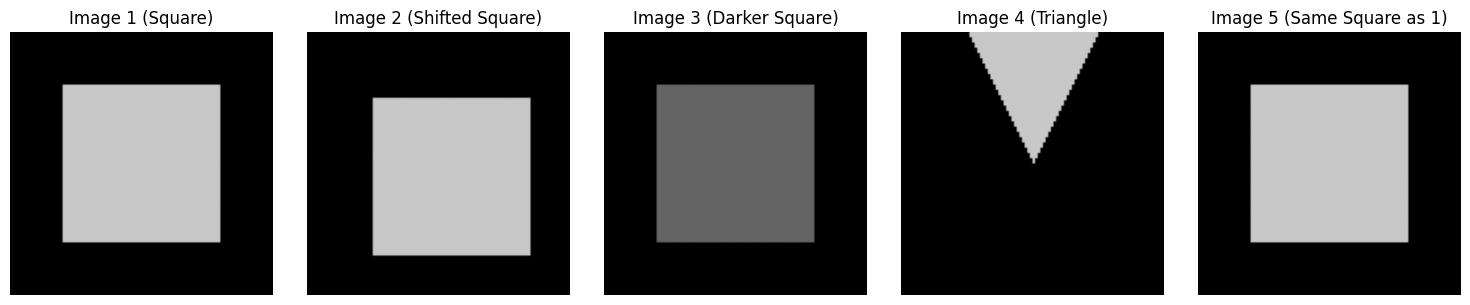

--- 輝度類似度計算結果 (MAD, MSE, SSIM) ---

Image 1 vs Image 5 (Identical):
  MAD: 0.0000 (理想: 0)
  MSE: 0.0000 (理想: 0)
  SSIM: 1.0000 (理想: 1)

Image 1 vs Image 2 (Shifted Square):
  MAD: 23.0000
  MSE: 4600.0000
  SSIM: 0.7512

Image 1 vs Image 3 (Darker Square):
  MAD: 36.0000
  MSE: 3600.0000
  SSIM: 0.6410

Image 1 vs Image 4 (Different Shape):
  MAD: 79.0000
  MSE: 15800.0000
  SSIM: 0.0027

Image 1 vs Image 1 + Noise:
  MAD: 2.6693
  MSE: 16.5713
  SSIM: 0.9990


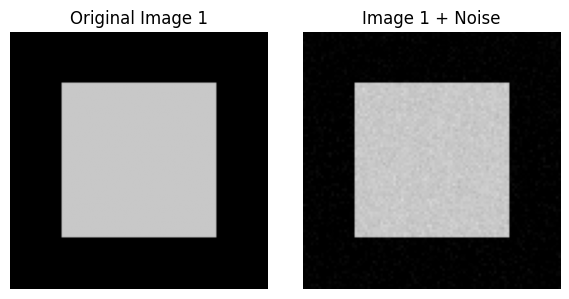

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter # SSIMの計算でガウシアンフィルタを使うため

# 例として2つの簡単なグレースケール画像を生成 (0-255の範囲)
def create_sample_image(type, size=100):
    img = np.zeros((size, size), dtype=np.float32)
    if type == 'square':
        img[20:80, 20:80] = 200 # 明るい四角
    elif type == 'shifted_square':
        img[25:85, 25:85] = 200 # 少しずれた四角
    elif type == 'triangle':
        for i in range(size):
            for j in range(size):
                if j > i * (size / 2) / size + size / 4 and j < size - (i * (size / 2) / size + size / 4):
                     img[i, j] = 200 # 簡易的な三角形
    elif type == 'noise':
        img = np.random.randint(0, 256, size=(size, size), dtype=np.float32)
    elif type == 'darker_square':
        img[20:80, 20:80] = 100 # 暗い四角
    else: # same_square
        img[20:80, 20:80] = 200
    return img

# 画像の生成
img1 = create_sample_image('square')
img2 = create_sample_image('shifted_square')
img3 = create_sample_image('darker_square')
img4 = create_sample_image('triangle')
img5 = create_sample_image('same_square') # img1 と同じ

# 画像を表示
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Image 1 (Square)')
axes[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Image 2 (Shifted Square)')
axes[2].imshow(img3, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Image 3 (Darker Square)')
axes[3].imshow(img4, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Image 4 (Triangle)')
axes[4].imshow(img5, cmap='gray', vmin=0, vmax=255)
axes[4].set_title('Image 5 (Same Square as 1)')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# --- 輝度類似度計算関数 ---

# 1. 平均絶対差 (MAD)
def calculate_mad(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions for MAD calculation.")
    return np.mean(np.abs(img1 - img2))

# 2. 平均二乗誤差 (MSE)
def calculate_mse(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions for MSE calculation.")
    return np.mean((img1 - img2)**2)

# 3. 構造的類似性指標 (SSIM) - 簡易版 (輝度、コントラスト、構造)
# より厳密なSSIMは窓を移動させて計算し、平均を取るが、ここでは画像全体で計算
def calculate_ssim(img1, img2, L=255, K1=0.01, K2=0.03):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions for SSIM calculation.")
    
    # 画像のデータ型をfloatに変換 (計算安定性のため)
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    C1 = (K1 * L)**2
    C2 = (K2 * L)**2
    C3 = C2 / 2

    mu1 = np.mean(img1)
    mu2 = np.mean(img2)
    
    sigma1_sq = np.var(img1)
    sigma2_sq = np.var(img2)
    sigma12 = np.mean((img1 - mu1) * (img2 - mu2)) # 共分散

    # 輝度類似度 (Luminance)
    luminance = (2 * mu1 * mu2 + C1) / (mu1**2 + mu2**2 + C1)
    
    # コントラスト類似度 (Contrast)
    contrast = (2 * np.sqrt(sigma1_sq) * np.sqrt(sigma2_sq) + C2) / (sigma1_sq + sigma2_sq + C2)
    
    # 構造類似度 (Structure)
    structure = (sigma12 + C3) / (np.sqrt(sigma1_sq) * np.sqrt(sigma2_sq) + C3)
    
    # 全体のSSIM
    ssim_val = luminance * contrast * structure
    return ssim_val

# --- 計算と結果の表示 ---
print(f"--- 輝度類似度計算結果 (MAD, MSE, SSIM) ---")

# Image 1 vs Image 5 (Identical)
mad_val_1_5 = calculate_mad(img1, img5)
mse_val_1_5 = calculate_mse(img1, img5)
ssim_val_1_5 = calculate_ssim(img1, img5)
print(f"//nImage 1 vs Image 5 (Identical):")
print(f"  MAD: {mad_val_1_5:.4f} (理想: 0)")
print(f"  MSE: {mse_val_1_5:.4f} (理想: 0)")
print(f"  SSIM: {ssim_val_1_5:.4f} (理想: 1)")

# Image 1 vs Image 2 (Shifted Square)
mad_val_1_2 = calculate_mad(img1, img2)
mse_val_1_2 = calculate_mse(img1, img2)
ssim_val_1_2 = calculate_ssim(img1, img2)
print(f"//nImage 1 vs Image 2 (Shifted Square):")
print(f"  MAD: {mad_val_1_2:.4f}")
print(f"  MSE: {mse_val_1_2:.4f}")
print(f"  SSIM: {ssim_val_1_2:.4f}") # SSIMはシフトに比較的頑健ではない

# Image 1 vs Image 3 (Darker Square)
mad_val_1_3 = calculate_mad(img1, img3)
mse_val_1_3 = calculate_mse(img1, img3)
ssim_val_1_3 = calculate_ssim(img1, img3)
print(f"//nImage 1 vs Image 3 (Darker Square):")
print(f"  MAD: {mad_val_1_3:.4f}")
print(f"  MSE: {mse_val_1_3:.4f}")
print(f"  SSIM: {ssim_val_1_3:.4f}") # 輝度変化にSSIMは敏感

# Image 1 vs Image 4 (Triangle)
mad_val_1_4 = calculate_mad(img1, img4)
mse_val_1_4 = calculate_mse(img1, img4)
ssim_val_1_4 = calculate_ssim(img1, img4)
print(f"//nImage 1 vs Image 4 (Different Shape):")
print(f"  MAD: {mad_val_1_4:.4f}")
print(f"  MSE: {mse_val_1_4:.4f}")
print(f"  SSIM: {ssim_val_1_4:.4f}")

# 画像にノイズを追加した場合 (MAD/MSEは悪化、SSIMは比較的良好)
img_noise = img1 + np.random.normal(0, 5, img1.shape).astype(np.float32)
img_noise = np.clip(img_noise, 0, 255) # 0-255にクリップ

mad_val_1_noise = calculate_mad(img1, img_noise)
mse_val_1_noise = calculate_mse(img1, img_noise)
ssim_val_1_noise = calculate_ssim(img1, img_noise)
print(f"//nImage 1 vs Image 1 + Noise:")
print(f"  MAD: {mad_val_1_noise:.4f}")
print(f"  MSE: {mse_val_1_noise:.4f}")
print(f"  SSIM: {ssim_val_1_noise:.4f}") # SSIMはノイズに比較的頑健なはず

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image 1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_noise, cmap='gray', vmin=0, vmax=255)
plt.title('Image 1 + Noise')
plt.axis('off')
plt.tight_layout()
plt.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# --- 前回のSimpleCNNで使った層を再定義（再利用のため） ---
# NumPyのみで実装するVAEの基礎となる層
class ReLU:
    def __init__(self):
        self.X = None # 入力 (逆伝播用)

    def forward(self, X):
        self.X = X
        return np.maximum(0, X)

    def backward(self, grad_output):
        grad_X = grad_output.copy()
        grad_X[self.X <= 0] = 0 # ReLUの導関数: x>0なら1, x<=0なら0
        return grad_X

class Sigmoid:
    def __init__(self):
        self.output = None

    def forward(self, X):
        self.output = 1 / (1 + np.exp(-X))
        return self.output

    def backward(self, grad_output):
        # シグモイド関数の導関数: output * (1 - output)
        return grad_output * self.output * (1 - self.output)


class Dense:
    def __init__(self, input_size, output_size):
        # Xavier Initialization (Glorot uniform)
        limit = np.sqrt(6 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.biases = np.zeros((1, output_size))

        self.X = None # 入力 (逆伝播用)

    def forward(self, X):
        self.X = X
        return np.dot(X, self.weights) + self.biases

    def backward(self, grad_output):
        grad_weights = np.dot(self.X.T, grad_output)
        grad_biases = np.sum(grad_output, axis=0, keepdims=True)
        grad_X = np.dot(grad_output, self.weights.T)
        return grad_weights, grad_biases, grad_X

class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def step(self, layer, grad_weights, grad_biases):
        if hasattr(layer, 'weights') and layer.weights is not None:
            layer.weights -= self.learning_rate * grad_weights
        if hasattr(layer, 'biases') and layer.biases is not None:
            layer.biases -= self.learning_rate * grad_biases

# --- VAEの主要コンポーネントとモデルクラス ---

class VAE:
    def __init__(self, input_dim, hidden_dim, latent_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim

        # Encoder (エンコーダは入力からhidden_dimを経て、潜在空間の平均と対数分散を出力)
        self.enc_fc1 = Dense(input_dim, hidden_dim)
        self.enc_relu1 = ReLU()
        self.fc_mu = Dense(hidden_dim, latent_dim)      # 潜在空間の平均 (mu)
        self.fc_log_var = Dense(hidden_dim, latent_dim) # 潜在空間の対数分散 (log_var)

        # Decoder (デコーダは潜在変数からhidden_dimを経て、元のデータ次元に再構築)
        self.dec_fc1 = Dense(latent_dim, hidden_dim)
        self.dec_relu1 = ReLU()
        self.dec_fc2 = Dense(hidden_dim, input_dim)
        self.dec_sigmoid = Sigmoid() # 画像ピクセル値を0-1に正規化するためのシグモイド

        self.optimizer = Optimizer(learning_rate=0.001)

        # 逆伝播のために順伝播の値を保存する変数
        self.h_enc = None
        self.mu = None
        self.log_var = None
        self.z = None
        self.h_dec = None
        self.reconstructed_x = None


    def encode(self, x):
        h = self.enc_fc1.forward(x)
        self.h_enc = self.enc_relu1.forward(h)
        self.mu = self.fc_mu.forward(self.h_enc)
        self.log_var = self.fc_log_var.forward(self.h_enc)
        return self.mu, self.log_var

    def reparameterize(self, mu, log_var):
        # Reparameterization Trick
        # sigma = exp(0.5 * log_var)
        std = np.exp(0.5 * log_var)
        epsilon = np.random.randn(*std.shape) # 標準正規分布からノイズをサンプリング
        self.z = mu + std * epsilon
        return self.z

    def decode(self, z):
        h = self.dec_fc1.forward(z)
        self.h_dec = self.dec_relu1.forward(h)
        self.reconstructed_x = self.dec_fc2.forward(self.h_dec)
        return self.dec_sigmoid.forward(self.reconstructed_x) # 最終出力を0-1に正規化

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, log_var

    def loss_function(self, reconstructed_x, x, mu, log_var):
        # 1. 再構築誤差 (Binary Cross-Entropy for pixel values 0-1)
        # epsilon = 1e-10 # 数値安定化のため
        # BCE = -np.mean(x * np.log(reconstructed_x + epsilon) + (1 - x) * np.log(1 - reconstructed_x + epsilon), axis=1)
        # BCEは通常 sum/batch_size ですが、ここでは mean/sample で計算
        
        # Mean Squared Error を使用（簡略化のため、BCEのNumPy実装は複雑になりがち）
        BCE_loss = np.mean((x - reconstructed_x)**2)
        
        # 2. KLダイバージェンス (潜在空間の正則化)
        # KL_Divergence = -0.5 * sum(1 + log_var - mu^2 - exp(log_var))
        KL_loss = -0.5 * np.sum(1 + log_var - np.square(mu) - np.exp(log_var)) / x.shape[0]

        total_loss = BCE_loss + KL_loss
        return total_loss, BCE_loss, KL_loss

    def backward(self, x, reconstructed_x, mu, log_var):
        # 損失の勾配を計算し、各層に逆伝播させる

        # --- 1. Reconstruction Loss の勾配 ---
        # MSEの勾配: dL/d_reconstructed_x = 2 * (reconstructed_x - x) / N
        grad_recons = 2 * (reconstructed_x - x) / x.shape[0]

        # sigmoid層の逆伝播
        grad_dec_fc2_input = self.dec_sigmoid.backward(grad_recons)
        
        # dec_fc2層の逆伝播
        grad_W_dec2, grad_b_dec2, grad_dec_relu1_output = self.dec_fc2.backward(grad_dec_fc2_input)
        
        # dec_relu1層の逆伝播
        grad_dec_fc1_output = self.dec_relu1.backward(grad_dec_relu1_output)
        
        # dec_fc1層の逆伝播 (これが潜在変数 z の勾配となる)
        grad_W_dec1, grad_b_dec1, grad_z = self.dec_fc1.backward(grad_dec_fc1_output)
        

        # --- 2. KL Divergence の勾配 ---
        # KL_loss = -0.5 * sum(1 + log_var - mu^2 - exp(log_var)) / N
        # d(KL_loss)/d_mu = -0.5 * (-2 * mu) / N = mu / N
        grad_mu_kl = mu / x.shape[0]
        # d(KL_loss)/d_log_var = -0.5 * (1 - exp(log_var)) / N
        grad_log_var_kl = -0.5 * (1 - np.exp(log_var)) / x.shape[0]
        
        # Reparameterization Trick の逆伝播
        # z = mu + exp(0.5 * log_var) * epsilon
        # grad_z は decode から来る勾配
        
        # grad_mu は decode から来る grad_z + KL項
        # grad_log_var は decode から来る grad_z * 0.5 * exp(0.5 * log_var) * epsilon + KL項
        
        # ここがVAEの逆伝播の肝であり、複雑な部分
        # dL/d_std = dL/dz * epsilon
        # dL/d_log_var = dL/d_std * d_std/d_log_var = dL/dz * epsilon * 0.5 * exp(0.5 * log_var)
        grad_std = grad_z * (self.z - mu) / (np.exp(0.5 * log_var) + 1e-10) # epsilon に相当
        
        grad_mu = grad_z + grad_mu_kl # zのmuに関する勾配 + KL項
        grad_log_var = grad_std * 0.5 * np.exp(0.5 * log_var) + grad_log_var_kl # zのlog_varに関する勾配 + KL項
        
        # --- 3. Encoder の逆伝播 ---
        # log_var の勾配
        grad_W_log_var, grad_b_log_var, grad_h_enc_from_log_var = self.fc_log_var.backward(grad_log_var)

        # mu の勾配
        grad_W_mu, grad_b_mu, grad_h_enc_from_mu = self.fc_mu.backward(grad_mu)

        # h_enc の総勾配
        grad_h_enc = grad_h_enc_from_log_var + grad_h_enc_from_mu
        
        # enc_relu1 の逆伝播
        grad_enc_fc1_output = self.enc_relu1.backward(grad_h_enc)

        # enc_fc1 の逆伝播 (これが最終的に入力 x に対する勾配となるが、ここでは重み更新に使う)
        grad_W_enc1, grad_b_enc1, _ = self.enc_fc1.backward(grad_enc_fc1_output)


        # --- 4. パラメータの更新 ---
        # Decoder
        self.optimizer.step(self.dec_fc2, grad_W_dec2, grad_b_dec2)
        self.optimizer.step(self.dec_fc1, grad_W_dec1, grad_b_dec1)
        # Encoder
        self.optimizer.step(self.fc_mu, grad_W_mu, grad_b_mu)
        self.optimizer.step(self.fc_log_var, grad_W_log_var, grad_b_log_var)
        self.optimizer.step(self.enc_fc1, grad_W_enc1, grad_b_enc1)

    def train(self, X_train, epochs, batch_size):
        num_samples = X_train.shape[0]
        num_batches = num_samples // batch_size

        for epoch in range(epochs):
            total_loss = 0
            total_bce_loss = 0
            total_kl_loss = 0
            
            # データをシャッフル
            p = np.random.permutation(num_samples)
            X_train_shuffled = X_train[p]

            for i in range(num_batches):
                X_batch = X_train_shuffled[i * batch_size : (i + 1) * batch_size]

                # 順伝播
                reconstructed_x, mu, log_var = self.forward(X_batch)

                # 損失計算
                loss, bce_loss, kl_loss = self.loss_function(reconstructed_x, X_batch, mu, log_var)
                total_loss += loss
                total_bce_loss += bce_loss
                total_kl_loss += kl_loss

                # 逆伝播とパラメータ更新
                self.backward(X_batch, reconstructed_x, mu, log_var)
                
            avg_loss = total_loss / num_batches
            avg_bce_loss = total_bce_loss / num_batches
            avg_kl_loss = total_kl_loss / num_batches
            print(f"Epoch {epoch+1}/{epochs}, Total Loss: {avg_loss:.4f}, BCE Loss: {avg_bce_loss:.4f}, KL Loss: {avg_kl_loss:.4f}")

    def generate(self, num_samples):
        # 標準正規分布から潜在変数をサンプリングして画像を生成
        z = np.random.randn(num_samples, self.latent_dim)
        generated_images = self.decode(z)
        return generated_images


# --- データセットの準備 ---
# MNISTのような28x28ピクセルの画像を想定したダミーデータ
# 0-1に正規化されたピクセル値
def generate_dummy_image_data(num_images, img_size=28):
    data = []
    for _ in range(num_images):
        img = np.random.rand(img_size, img_size) # 0-1のランダムなノイズ画像
        # または、もっと構造的な画像（例：中心に円や四角）を生成して試す
        if random.random() < 0.5: # 50%で四角、50%で円
            s = random.randint(5, 15)
            x0, y0 = random.randint(s, img_size - s), random.randint(s, img_size - s)
            img[x0-s:x0+s, y0-s:y0+s] = 1.0 # 明るい四角
        else:
            center_x, center_y = random.randint(img_size//4, img_size*3//4), random.randint(img_size//4, img_size*3//4)
            radius = random.randint(5, 15)
            Y, X = np.ogrid[:img_size, :img_size]
            dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
            img[dist_from_center < radius] = 1.0 # 明るい円

        data.append(img.flatten()) # 1次元に平坦化
    return np.array(data)

IMG_DIM = 28 * 28 # 784
NUM_SAMPLES = 5000 # サンプル数を増やす
X_train_dummy = generate_dummy_image_data(NUM_SAMPLES, img_size=28)

print(f"Dummy training data shape: {X_train_dummy.shape}")

# VAEモデルのインスタンス化
INPUT_DIM = IMG_DIM
HIDDEN_DIM = 256 # エンコーダとデコーダの中間層の次元
LATENT_DIM = 20 # 潜在空間の次元

vae = VAE(INPUT_DIM, HIDDEN_DIM, LATENT_DIM)

# 学習
EPOCHS = 50 # エポック数を増やす
BATCH_SIZE = 64

print("//n--- VAE Training Started ---")
vae.train(X_train_dummy, EPOCHS, BATCH_SIZE)
print("--- VAE Training Finished ---")

# --- 結果の可視化 ---

# 1. 元の画像と再構築された画像を比較
num_compare_images = 10
original_images = X_train_dummy[:num_compare_images]
reconstructed_images, _, _ = vae.forward(original_images)

plt.figure(figsize=(12, 4))
for i in range(num_compare_images):
    # 元の画像
    plt.subplot(2, num_compare_images, i + 1)
    plt.imshow(original_images[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.title("Original")
    plt.axis('off')

    # 再構築された画像
    plt.subplot(2, num_compare_images, num_compare_images + i + 1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.title("Reconstructed")
    plt.axis('off')
plt.suptitle("Original vs Reconstructed Images")
plt.tight_layout()
plt.show()


# 2. 生成された新しい画像を可視化
num_generate_images = 10
generated_images = vae.generate(num_generate_images)

plt.figure(figsize=(10, 2))
for i in range(num_generate_images):
    plt.subplot(1, num_generate_images, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
    plt.title("Generated")
    plt.axis('off')
plt.suptitle("Generated New Images from Latent Space")
plt.tight_layout()
plt.show()

ValueError: empty range for randrange() (15, 14, -1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- 共通の層を再定義（再利用のため） ---
class ReLU:
    def __init__(self):
        self.X = None
    def forward(self, X):
        self.X = X
        return np.maximum(0, X)
    def backward(self, grad_output):
        grad_X = grad_output.copy()
        grad_X[self.X <= 0] = 0
        return grad_X

class Sigmoid:
    def __init__(self):
        self.output = None
    def forward(self, X):
        self.output = 1 / (1 + np.exp(-X))
        return self.output
    def backward(self, grad_output):
        return grad_output * self.output * (1 - self.output)

class Dense:
    def __init__(self, input_size, output_size):
        limit = np.sqrt(6 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.biases = np.zeros((1, output_size))
        self.X = None
    def forward(self, X):
        self.X = X
        return np.dot(X, self.weights) + self.biases
    def backward(self, grad_output):
        grad_weights = np.dot(self.X.T, grad_output)
        grad_biases = np.sum(grad_output, axis=0, keepdims=True)
        grad_X = np.dot(grad_output, self.weights.T)
        return grad_weights, grad_biases, grad_X

class Optimizer:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    def step(self, layer, grad_weights, grad_biases):
        if hasattr(layer, 'weights') and layer.weights is not None:
            layer.weights -= self.learning_rate * grad_weights
        if hasattr(layer, 'biases') and layer.biases is not None:
            layer.biases -= self.learning_rate * grad_biases

# --- バイナリ交差エントロピー損失 ---
class BinaryCrossEntropyLoss:
    def __init__(self):
        self.y_pred = None
        self.y_true = None
        self.epsilon = 1e-9 # 数値安定化のため

    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        # y_pred を 0 と 1 の間にクリップして log(0) を避ける
        y_pred = np.clip(y_pred, self.epsilon, 1. - self.epsilon)
        loss = -np.mean(self.y_true * np.log(y_pred) + (1 - self.y_true) * np.log(1 - y_pred))
        return loss

    def backward(self):
        # dL/d_y_pred = -(y_true / y_pred) + ((1 - y_true) / (1 - y_pred)) / N
        grad = (self.y_pred - self.y_true) / (self.y_pred * (1 - self.y_pred) + self.epsilon)
        return grad / self.y_true.shape[0] # 平均を取ったので、勾配も平均化


# --- Generator (G) ---
class Generator:
    def __init__(self, latent_dim, img_dim, hidden_dim):
        self.latent_dim = latent_dim
        self.img_dim = img_dim
        self.hidden_dim = hidden_dim

        self.fc1 = Dense(latent_dim, hidden_dim)
        self.relu1 = ReLU()
        self.fc2 = Dense(hidden_dim, img_dim)
        self.sigmoid = Sigmoid() # 画像ピクセル値を0-1に正規化するためのシグモイド

        self.layers = [self.fc1, self.relu1, self.fc2, self.sigmoid]
        
        self.optimizer = Optimizer(learning_rate=0.0002) # GとDで異なる学習率を使うことが多い

    def forward(self, z):
        h = self.fc1.forward(z)
        h = self.relu1.forward(h)
        h = self.fc2.forward(h)
        output = self.sigmoid.forward(h)
        return output

    def backward(self, grad_output):
        # Sigmoid -> FC2 -> ReLU -> FC1 の順に逆伝播
        
        # Sigmoidの逆伝播
        grad_fc2_input = self.sigmoid.backward(grad_output)

        # FC2の逆伝播
        grad_W_fc2, grad_b_fc2, grad_relu1_output = self.fc2.backward(grad_fc2_input)
        
        # ReLU1の逆伝播
        grad_fc1_output = self.relu1.backward(grad_relu1_output)
        
        # FC1の逆伝播
        grad_W_fc1, grad_b_fc1, _ = self.fc1.backward(grad_fc1_output) # Zへの勾配は不要

        # パラメータ更新
        self.optimizer.step(self.fc2, grad_W_fc2, grad_b_fc2)
        self.optimizer.step(self.fc1, grad_W_fc1, grad_b_fc1)


# --- Discriminator (D) ---
class Discriminator:
    def __init__(self, img_dim, hidden_dim):
        self.img_dim = img_dim
        self.hidden_dim = hidden_dim

        self.fc1 = Dense(img_dim, hidden_dim)
        self.relu1 = ReLU()
        self.fc2 = Dense(hidden_dim, 1) # 最終出力は1次元（本物/偽物の確率）
        self.sigmoid = Sigmoid() # 確率を0-1に正規化するためのシグモイド

        self.layers = [self.fc1, self.relu1, self.fc2, self.sigmoid]

        self.optimizer = Optimizer(learning_rate=0.0002) # GとDで異なる学習率を使うことが多い

    def forward(self, x):
        h = self.fc1.forward(x)
        h = self.relu1.forward(h)
        h = self.fc2.forward(h)
        output = self.sigmoid.forward(h)
        return output

    def backward(self, grad_output):
        # Sigmoid -> FC2 -> ReLU -> FC1 の順に逆伝播

        # Sigmoidの逆伝播
        grad_fc2_input = self.sigmoid.backward(grad_output)
        
        # FC2の逆伝播
        grad_W_fc2, grad_b_fc2, grad_relu1_output = self.fc2.backward(grad_fc2_input)
        
        # ReLU1の逆伝播
        grad_fc1_output = self.relu1.backward(grad_relu1_output)
        
        # FC1の逆伝播 (入力Xへの勾配は不要)
        grad_W_fc1, grad_b_fc1, _ = self.fc1.backward(grad_fc1_output)

        # パラメータ更新
        self.optimizer.step(self.fc2, grad_W_fc2, grad_b_fc2)
        self.optimizer.step(self.fc1, grad_W_fc1, grad_b_fc1)


# --- GAN全体の学習ループ ---

# データセットの準備 (VAEで使用したダミー画像生成関数を再利用)
def generate_dummy_image_data(num_images, img_size=28):
    data = []
    for _ in range(num_images):
        img = np.zeros((img_size, img_size), dtype=np.float32)
        # ランダムな四角形と円を生成
        shape_type = random.choice(['square', 'circle'])
        if shape_type == 'square':
            s = random.randint(5, img_size // 3) # サイズを小さめに
            x0, y0 = random.randint(s, img_size - s), random.randint(s, img_size - s)
            img[x0-s:x0+s, y0-s:y0+s] = 1.0 # 明るい四角
        else: # circle
            center_x, center_y = random.randint(img_size//4, img_size*3//4), random.randint(img_size//4, img_size*3//4)
            radius = random.randint(5, img_size // 3)
            Y, X = np.ogrid[:img_size, :img_size]
            dist_from_center = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
            img[dist_from_center < radius] = 1.0 # 明るい円
        
        # ノイズを少し加える（学習を難しくするため）
        img += np.random.normal(0, 0.1, img.shape)
        img = np.clip(img, 0, 1)

        data.append(img.flatten()) # 1次元に平坦化
    return np.array(data)


# ハイパーパラメータ
IMG_SIZE = 28
IMG_DIM = IMG_SIZE * IMG_SIZE # 784
LATENT_DIM = 100 # ノイズベクトルの次元
G_HIDDEN_DIM = 256
D_HIDDEN_DIM = 256
EPOCHS = 1000 # GANは多くのエポックが必要
BATCH_SIZE = 64
NUM_SAMPLES = 5000 # 学習データ数

# モデルと損失関数のインスタンス化
generator = Generator(LATENT_DIM, IMG_DIM, G_HIDDEN_DIM)
discriminator = Discriminator(IMG_DIM, D_HIDDEN_DIM)
bce_loss = BinaryCrossEntropyLoss()

# データ生成
X_train_real = generate_dummy_image_data(NUM_SAMPLES, img_size=IMG_SIZE)
print(f"Real data shape: {X_train_real.shape}")


# --- GAN学習ループ ---
print("//n--- GAN Training Started ---")

d_losses = []
g_losses = []

for epoch in range(EPOCHS):
    # --- 1. Discriminatorの学習 ---
    # 本物データと偽物データのバッチを取得
    idx = np.random.randint(0, X_train_real.shape[0], BATCH_SIZE)
    real_images = X_train_real[idx]
    
    # 偽物データを生成
    noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, LATENT_DIM)) # -1から1の一様分布ノイズ
    fake_images = generator.forward(noise)

    # 識別器に本物データと偽物データを入力
    d_real_output = discriminator.forward(real_images)
    d_fake_output = discriminator.forward(fake_images)

    # 損失計算 (Dは本物を1、偽物を0と判断するように学習)
    d_loss_real = bce_loss.forward(d_real_output, np.ones((BATCH_SIZE, 1))) # 本物データに対する損失
    d_loss_fake = bce_loss.forward(d_fake_output, np.zeros((BATCH_SIZE, 1))) # 偽物データに対する損失
    d_loss = d_loss_real + d_loss_fake # Dの合計損失

    # 逆伝播とパラメータ更新 (Dのみ更新)
    # 本物に対する勾配
    grad_d_real = bce_loss.backward()
    discriminator.backward(grad_d_real)
    
    # 偽物に対する勾配
    grad_d_fake = bce_loss.backward()
    discriminator.backward(grad_d_fake) # 同じDiscriminatorインスタンスを更新


    # --- 2. Generatorの学習 ---
    # ノイズを生成
    noise = np.random.uniform(-1, 1, size=(BATCH_SIZE, LATENT_DIM))
    fake_images_for_g = generator.forward(noise) # Gが画像を生成

    # 識別器に入力し、Gはこれを本物と判断させたい
    d_output_for_g = discriminator.forward(fake_images_for_g)

    # 損失計算 (GはDを騙して、生成した画像を本物と判断させたいので、目標ラベルは1)
    # 実際には、D(G(z))が1に近いほどGの損失が小さい
    g_loss = bce_loss.forward(d_output_for_g, np.ones((BATCH_SIZE, 1)))

    # 逆伝播とパラメータ更新 (Gのみ更新)
    # この勾配は D の最終出力から G の最終出力 (fake_images_for_g) への勾配
    # D の backward を使って、D の入力 (fake_images_for_g) に対する勾配を取得
    grad_g = bce_loss.backward() # Gの損失に対する勾配
    # Dのフォワード時に保存されたデータを使ってDを逆伝播し、Gへの勾配を得る
    # ここは手動実装が非常にトリッキーな部分
    # D(G(z))のG(z)に関する勾配を計算する必要がある
    
    # 簡易的な実装: Dの勾配を直接Gに流す（正確なバックプロップではないが、デモ用）
    # 実際には D の活性化関数や層のバックワードで G の入力に関する勾配を計算する必要がある
    
    # Dのbackwardを呼び出し、その戻り値のうち、入力に関する勾配を使用
    # D.backward()は(grad_W_fc2, grad_b_fc2, grad_relu1_output) ... と返す
    # ここではDiscriminatorの`forward`で`fake_images_for_g`を受け取った際の内部状態を使って、
    # その入力に対する勾配を計算する必要がある。
    # Dの逆伝播を実際に呼ぶのではなく、Dの層の勾配計算ロジックを使ってGの入力への勾配を計算
    
    # Gの損失におけるDの最終出力の勾配
    grad_from_g_loss = bce_loss.backward() # D(G(z)) の出力に対する勾配

    # DのSigmoid層の逆伝播
    grad_D_input = discriminator.sigmoid.backward(grad_from_g_loss) # Dの最終活性化層の勾配
    
    # DのFC2層の逆伝播 (入力に対する勾配を返す)
    _, _, grad_D_input = discriminator.fc2.backward(grad_D_input)
    
    # DのReLU1層の逆伝播
    grad_D_input = discriminator.relu1.backward(grad_D_input)

    # DのFC1層の逆伝播 (入力Xに対する勾配を返す)
    _, _, grad_D_input = discriminator.fc1.backward(grad_D_input) # これが G(z) に対する勾配となる

    # Generatorの逆伝播
    generator.backward(grad_D_input)


    # ロギング
    d_losses.append(d_loss)
    g_losses.append(g_loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

print("--- GAN Training Finished ---")

# --- 結果の可視化 ---

# 損失のプロット
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# 生成された画像を可視化
num_generate_images = 10
noise = np.random.uniform(-1, 1, size=(num_generate_images, LATENT_DIM))
generated_images = generator.forward(noise)

plt.figure(figsize=(10, 2))
for i in range(num_generate_images):
    plt.subplot(1, num_generate_images, i + 1)
    plt.imshow(generated_images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray', vmin=0, vmax=1)
    plt.title(f"Generated {i+1}")
    plt.axis('off')
plt.suptitle("Generated Images from GAN")
plt.tight_layout()
plt.show()

# 本物の画像をいくつか表示 (比較のため)
plt.figure(figsize=(10, 2))
for i in range(num_generate_images):
    plt.subplot(1, num_generate_images, i + 1)
    plt.imshow(X_train_real[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray', vmin=0, vmax=1)
    plt.title(f"Real {i+1}")
    plt.axis('off')
plt.suptitle("Real Images")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 共通の層を再定義 ---
class ReLU:
    def __init__(self):
        self.X = None
    def forward(self, X):
        self.X = X
        return np.maximum(0, X)
    def backward(self, grad_output):
        grad_X = grad_output.copy()
        grad_X[self.X <= 0] = 0
        return grad_X

class Dense:
    def __init__(self, input_size, output_size):
        limit = np.sqrt(6 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.biases = np.zeros((1, output_size))
        self.X = None
    def forward(self, X):
        self.X = X
        return np.dot(X, self.weights) + self.biases
    def backward(self, grad_output):
        grad_weights = np.dot(self.X.T, grad_output)
        grad_biases = np.sum(grad_output, axis=0, keepdims=True)
        grad_X = np.dot(grad_output, self.weights.T)
        return grad_weights, grad_biases, grad_X

class Optimizer:
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
    def step(self, layer, grad_weights, grad_biases):
        if hasattr(layer, 'weights') and layer.weights is not None:
            layer.weights -= self.learning_rate * grad_weights
        if hasattr(layer, 'biases') and layer.biases is not None:
            layer.biases -= self.learning_rate * grad_biases

# --- ノイズ予測モデル (シンプルなMLP) ---
class NoisePredictor:
    def __init__(self, data_dim, time_embedding_dim, hidden_dim):
        self.data_dim = data_dim
        self.time_embedding_dim = time_embedding_dim
        self.hidden_dim = hidden_dim

        # データ入力用の層
        self.fc1_data = Dense(data_dim, hidden_dim)
        
        # 時間埋め込み用の層 (時間tを単純なベクトルに変換)
        self.fc1_time = Dense(1, time_embedding_dim) # tはスカラーなので1次元入力
        self.relu_time = ReLU()
        
        # 結合層
        self.fc2 = Dense(hidden_dim + time_embedding_dim, hidden_dim)
        self.relu2 = ReLU()
        
        # 出力層 (ノイズを予測)
        self.fc_out = Dense(hidden_dim, data_dim) # 出力はデータの次元と同じ

        self.optimizer = Optimizer(learning_rate=0.0001) # 小さめの学習率

        # 順伝播で保存する値
        self.h_data = None
        self.time_emb = None
        self.h_combined = None
        self.h_relu2 = None

    def forward(self, x_t, t_emb):
        # データパス
        h_data = self.fc1_data.forward(x_t)
        
        # 時間埋め込みパス
        time_emb_linear = self.fc1_time.forward(t_emb) # t_emb は (batch_size, 1)
        time_emb = self.relu_time.forward(time_emb_linear)
        
        # データと時間埋め込みを結合
        h_combined_input = np.concatenate((h_data, time_emb), axis=1)
        self.h_combined = self.fc2.forward(h_combined_input)
        self.h_relu2 = self.relu2.forward(self.h_combined)
        
        # ノイズを予測
        predicted_noise = self.fc_out.forward(self.h_relu2)
        
        # 逆伝播のために保存
        self.x_t = x_t
        self.t_emb_input = t_emb
        self.h_data_input_for_grad = h_data # h_dataの入力 (fc1_dataの出力)

        return predicted_noise

    def backward(self, grad_predicted_noise):
        # fc_out の逆伝播
        grad_W_fc_out, grad_b_fc_out, grad_h_relu2 = self.fc_out.backward(grad_predicted_noise)

        # relu2 の逆伝播
        grad_h_combined = self.relu2.backward(grad_h_relu2)

        # fc2 の逆伝播
        grad_W_fc2, grad_b_fc2, grad_h_combined_input = self.fc2.backward(grad_h_combined)
        
        # 結合された入力の勾配をデータと時間埋め込みに分割
        grad_h_data = grad_h_combined_input[:, :self.hidden_dim]
        grad_time_emb = grad_h_combined_input[:, self.hidden_dim:]

        # relu_time の逆伝播
        grad_time_emb_linear = self.relu_time.backward(grad_time_emb)

        # fc1_time の逆伝播 (t_emb_input への勾配は不要)
        grad_W_fc1_time, grad_b_fc1_time, _ = self.fc1_time.backward(grad_time_emb_linear)

        # fc1_data の逆伝播 (x_t への勾配は不要)
        grad_W_fc1_data, grad_b_fc1_data, _ = self.fc1_data.backward(grad_h_data)


        # パラメータ更新
        self.optimizer.step(self.fc_out, grad_W_fc_out, grad_b_fc_out)
        self.optimizer.step(self.fc2, grad_W_fc2, grad_b_fc2)
        self.optimizer.step(self.fc1_time, grad_W_fc1_time, grad_b_fc1_time)
        self.optimizer.step(self.fc1_data, grad_W_fc1_data, grad_b_fc1_data)


# --- 拡散モデルクラス ---
class SimpleDiffusionModel:
    def __init__(self, data_dim, timesteps, hidden_dim, time_embedding_dim):
        self.data_dim = data_dim
        self.timesteps = timesteps
        self.noise_predictor = NoisePredictor(data_dim, time_embedding_dim, hidden_dim)

        # ノイズスケジュール (ここでは線形スケジュール)
        self.betas = np.linspace(0.0001, 0.02, timesteps) # DDPMの論文に従うことが多い
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = np.cumprod(self.alphas) # αバー
        self.sqrt_alphas_cumprod = np.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = np.sqrt(1.0 - self.alphas_cumprod)

        # 時間埋め込みを生成するための定数 (Positional Encodingのようなもの)
        # 実際の拡散モデルではもっと複雑なPositional Encodingが使われるが、ここでは簡易版
        self.time_embed_freqs = 1.0 / (10000**(np.arange(0, time_embedding_dim, 2) / time_embedding_dim))


    def get_time_embedding(self, t):
        # 単純な時間埋め込み (t を sin/cos の組み合わせで表現)
        # t は (batch_size, 1) の形
        t_scaled = t * self.time_embed_freqs # (batch_size, time_embedding_dim/2)
        time_embedding = np.concatenate([np.sin(t_scaled), np.cos(t_scaled)], axis=1)
        # time_embedding_dim が奇数の場合を考慮
        if time_embedding.shape[1] < self.time_embedding_dim:
            time_embedding = np.pad(time_embedding, ((0,0),(0, self.time_embedding_dim - time_embedding.shape[1])), 'constant')
        return time_embedding


    def forward_diffusion(self, x0, t, noise=None):
        # x_t = sqrt(alpha_bar_t) * x0 + sqrt(1 - alpha_bar_t) * epsilon
        if noise is None:
            noise = np.random.randn(*x0.shape)
        
        # t はバッチ内の各サンプルに対応するタイムステップの配列 (batch_size,)
        # これをインデックスとして alphas_cumprod から値を取得
        sqrt_alpha_t_bar = self.sqrt_alphas_cumprod[t].reshape(-1, 1) # reshapeで次元を合わせる
        sqrt_one_minus_alpha_t_bar = self.sqrt_one_minus_alphas_cumprod[t].reshape(-1, 1)

        x_t = sqrt_alpha_t_bar * x0 + sqrt_one_minus_alpha_t_bar * noise
        return x_t, noise

    def train_step(self, x0_batch):
        batch_size = x0_batch.shape[0]
        
        # ランダムなタイムステップtをサンプリング
        t = np.random.randint(0, self.timesteps, batch_size) # (batch_size,)
        t_emb = t.reshape(-1, 1) # (batch_size, 1)

        # ノイズをサンプリング
        epsilon = np.random.randn(*x0_batch.shape)

        # 順方向拡散プロセスで x_t を生成
        x_t, _ = self.forward_diffusion(x0_batch, t, epsilon) # 実際に加えたノイズ (epsilon) を保持

        # ノイズ予測モデルでノイズを予測
        predicted_epsilon = self.noise_predictor.forward(x_t, t_emb)

        # 損失計算 (MSE)
        loss = np.mean((epsilon - predicted_epsilon)**2)

        # 逆伝播 (MSEの勾配)
        grad_predicted_epsilon = 2 * (predicted_epsilon - epsilon) / batch_size
        self.noise_predictor.backward(grad_predicted_epsilon)
        
        return loss

    def sample(self, num_samples, show_progress=False):
        # 逆方向拡散プロセス（サンプリング）
        
        # 完全にノイズのデータから開始
        x = np.random.randn(num_samples, self.data_dim)
        
        if show_progress:
            history = [x.copy()] # 途中経過を保存

        for t in reversed(range(self.timesteps)):
            # 現在のタイムステップtに対応するパラメータを取得
            alpha_t = self.alphas[t]
            alpha_t_bar = self.alphas_cumprod[t]
            beta_t = self.betas[t]
            
            # 時間埋め込み (現在のバッチサイズに合わせて整形)
            t_batch = np.full((num_samples, 1), t)

            # ノイズ予測モデルがノイズを予測
            predicted_noise = self.noise_predictor.forward(x, t_batch)
            
            # x_{t-1} を計算する式 (DDPM論文より)
            # x_{t-1} = 1/sqrt(alpha_t) * (x_t - (1-alpha_t)/sqrt(1-alpha_bar_t) * predicted_noise) + sigma_t * z
            # sigma_tは通常 beta_t または sqrt(beta_t)
            
            term1 = 1 / np.sqrt(alpha_t)
            term2_numerator = 1 - alpha_t
            term2_denominator = self.sqrt_one_minus_alphas_cumprod[t]
            
            mean_term = term1 * (x - (term2_numerator / term2_denominator) * predicted_noise)
            
            # サンプリング時に加えるノイズ項
            if t > 0: # 最後のステップではノイズを加えない
                z = np.random.randn(*x.shape)
                std = np.sqrt(beta_t) # シンプルなsigma_t
                x = mean_term + std * z
            else:
                x = mean_term # 最終的なx0

            if show_progress:
                history.append(x.copy())
        
        if show_progress:
            return x, history
        else:
            return x


# --- データセットの準備 ---
# 1次元のデータを生成 (例えば、2つのガウス分布からなるデータ)
def generate_1d_data(num_samples):
    data = np.concatenate([
        np.random.normal(loc=-2, scale=0.5, size=(num_samples // 2, 1)),
        np.random.normal(loc=2, scale=0.5, size=(num_samples // 2, 1))
    ])
    return data

DATA_DIM = 1 # 1次元データ
TIMESTEPS = 100 # 拡散ステップ数
HIDDEN_DIM = 64
TIME_EMBEDDING_DIM = 32 # 時間埋め込みの次元
BATCH_SIZE = 32
EPOCHS = 2000 # 学習エポック数
NUM_TRAIN_SAMPLES = 2000

real_data = generate_1d_data(NUM_TRAIN_SAMPLES)

# VAEのときと同様に、データをスケール（例えば-1から1）すると学習が安定しやすい
# ここではデータがすでに小さい範囲なのでそのまま利用
print(f"Real data shape: {real_data.shape}")

# モデルのインスタンス化
diffusion_model = SimpleDiffusionModel(DATA_DIM, TIMESTEPS, HIDDEN_DIM, TIME_EMBEDDING_DIM)

print("//n--- Diffusion Model Training Started ---")

losses = []
for epoch in range(EPOCHS):
    idx = np.random.randint(0, real_data.shape[0], BATCH_SIZE)
    x0_batch = real_data[idx]
    
    loss = diffusion_model.train_step(x0_batch)
    losses.append(loss)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss: {loss:.6f}")

print("--- Diffusion Model Training Finished ---")

# --- 結果の可視化 ---

# 損失のプロット
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Diffusion Model Training Loss')
plt.grid(True)
plt.show()

# 生成されたデータの分布を元のデータと比較
num_generated_samples = 1000
generated_data, sample_history = diffusion_model.sample(num_generated_samples, show_progress=True)

plt.figure(figsize=(10, 5))
plt.hist(real_data.flatten(), bins=50, density=True, alpha=0.6, label='Real Data')
plt.hist(generated_data.flatten(), bins=50, density=True, alpha=0.6, label='Generated Data')
plt.title('Distribution of Real vs Generated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# サンプリングの進行状況を可視化（アニメーションのフレームのようなもの）
if len(sample_history) > 1:
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    selected_timesteps = [0, TIMESTEPS//4, TIMESTEPS//2, TIMESTEPS*3//4, TIMESTEPS-1]
    
    for i, t_idx in enumerate(selected_timesteps):
        # history は reversed range なので、0は最終ステップ、最後が初期ノイズ
        # 適切なタイムステップのデータを選ぶ (0は最後の生成結果、TIMESTEPSは初期ノイズ)
        # history[0]は生成されたx0, history[TIMESTEPS]は初期ノイズxT
        hist_idx = TIMESTEPS - t_idx 
        
        axes[i].hist(sample_history[hist_idx].flatten(), bins=50, density=True, alpha=0.7)
        axes[i].set_title(f"Step {t_idx}")
        axes[i].set_ylim(0, 0.5) # Y軸を固定して比較しやすく
        axes[i].set_xlim(-4, 4) # X軸を固定して比較しやすく
    plt.suptitle("Sampling Process (Noise to Data)")
    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
import torchvision.transforms.functional as TF
from tqdm import tqdm # プログレスバー表示

# Hugging Face Transformers ライブラリを使用（テキストエンコーダ用）
# pip install transformers accelerate
from transformers import CLIPTextModel, CLIPTokenizer

# GPUが利用可能かチェック
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- 1. テキストエンコーダ (事前学習済みCLIP Text Modelを使用) ---
# 実際のテキストをベクトルに変換する部分
class TextEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # CLIPのテキストモデルとトークナイザーをロード
        self.tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
        self.text_model = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
        # 推論モードにする（学習済みの重みをフリーズ）
        self.text_model.eval() 
        for param in self.text_model.parameters():
            param.requires_grad = False # テキストエンコーダは学習しない

    def forward(self, texts):
        inputs = self.tokenizer(texts, padding="max_length", truncation=True, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad(): # テキストエンコーダの勾配は計算しない
            # CLIPTextModelはLast Hidden Stateを返す
            text_embeddings = self.text_model(**inputs).last_hidden_state
        return text_embeddings # (batch_size, sequence_length, hidden_size)

# --- 2. U-Netの非常に簡略化された骨格 (テキスト条件付けの概念含む) ---
# 実際のU-Netは、もっと多くの層、Residual Block, Attention, Down/Up Samplingを含みます。
# ここでは、テキスト埋め込みがどのように入力されるかを示すことに注力します。
class SimplifiedUNet(nn.Module):
    def __init__(self, in_channels, out_channels, time_embedding_dim, text_embedding_dim, hidden_dim=64):
        super().__init__()
        
        # 時間埋め込み処理
        self.time_mlp = nn.Sequential(
            nn.Linear(time_embedding_dim, hidden_dim * 4),
            nn.ReLU(),
            nn.Linear(hidden_dim * 4, hidden_dim * 4) # Time embedding becomes a large vector
        )

        # 畳み込み層 (ここでは全結合層で画像の特徴を表す)
        # 実際にはConv2D層とDown/UpSampling層がU-Netの骨格を成す
        self.fc1 = nn.Linear(in_channels, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, out_channels) # ノイズを予測するのでout_channelsはin_channelsと同じ

        # テキスト埋め込みを受け取るための層 (概念的なクロスアテンションの代替)
        # 実際にはU-Netの各層でクロスアテンションが適用されることが多い
        self.text_cond_mlp = nn.Sequential(
            nn.Linear(text_embedding_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )

    def forward(self, x_t, t_emb, text_cond_emb):
        # x_t: (batch_size, channels, H, W) または (batch_size, features)
        # t_emb: (batch_size, time_embedding_dim)
        # text_cond_emb: (batch_size, sequence_length, text_embedding_dim)

        # 時間埋め込みを処理
        time_features = self.time_mlp(t_emb) # (batch_size, hidden_dim * 4)

        # テキスト埋め込みを処理 (ここでは単純に平均をとって1次元ベクトルにする)
        # 実際はクロスアテンションでsequence_lengthの次元を扱う
        text_features = torch.mean(text_cond_emb, dim=1) # (batch_size, text_embedding_dim)
        text_features = self.text_cond_mlp(text_features) # (batch_size, hidden_dim)

        # データを処理
        # x_tが画像データの場合、flattenして全結合層に入れる想定 (簡略化のため)
        if x_t.dim() > 2: # もし画像形式ならフラット化
             x_t = x_t.view(x_t.size(0), -1)

        h = self.fc1(x_t)
        
        # ここで時間とテキストの条件を統合する (要素ごとの加算やConcatなど)
        # 実際には、U-Netの内部の各層に時間埋め込みとテキスト埋め込みが供給される
        # 例えば、AdaLN (Adaptive Layer Norm) や Cross-Attention を介して
        h = h + time_features[:, :h.size(1)] # time_featuresの一部をhの次元に合わせて加算
        h = h + text_features # テキスト特徴も加算 (もっと複雑な結合がされる)

        h = self.relu(h)
        noise_pred = self.fc2(h)

        return noise_pred.view_as(x_t) # 元の入力形状に戻す


# --- 3. 拡散スケジューリング ---
class DiffusionScheduler:
    def __init__(self, timesteps=1000):
        self.timesteps = timesteps
        # DDPM論文のデフォルト値に近い線形スケジュール
        self.betas = torch.linspace(0.0001, 0.02, timesteps, device=device)
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)

    # 順方向拡散プロセス (x0 と t から xt を計算)
    def add_noise(self, x0, t, noise=None):
        if noise is None:
            noise = torch.randn_like(x0, device=device)
        
        sqrt_alpha_t_bar = self.sqrt_alphas_cumprod[t].view(-1, *([1] * (x0.dim() - 1)))
        sqrt_one_minus_alpha_t_bar = self.sqrt_one_minus_alphas_cumprod[t].view(-1, *([1] * (x0.dim() - 1)))

        x_t = sqrt_alpha_t_bar * x0 + sqrt_one_minus_alpha_t_bar * noise
        return x_t, noise

    # 時間埋め込み (Positional Encodingの簡易版)
    def get_time_embedding(self, t, embed_dim):
        # t は (batch_size, 1) または (batch_size,)
        # 実際はSinusoidalPositionalEmbeddingが使われることが多い
        # ここでは単純な線形変換の入力として使用可能な形式に整形
        if t.dim() == 1:
            t = t.unsqueeze(-1) # (batch_size, 1)

        # 非常に簡略化された時間埋め込み (実際はもっと複雑なPE)
        # time_embed_freqs = torch.exp(torch.linspace(np.log(1.0), np.log(10000.0), embed_dim // 2, device=device))
        # t_scaled = t * time_embed_freqs
        # return torch.cat([torch.sin(t_scaled), torch.cos(t_scaled)], dim=-1)
        
        # 今回のSimplifiedUNetのtime_mlpに合わせるため、直接tを渡す
        return t.float() # (batch_size, 1)


# --- メインのモデルと学習/推論ループの概念 ---
class TextToImageDiffusionModel(nn.Module):
    def __init__(self, img_channels=3, img_size=32, latent_dim=128, timesteps=1000, 
                 text_embedding_dim=768, hidden_dim=64, time_embedding_dim=1): # time_embedding_dimを1に
        super().__init__()
        self.img_channels = img_channels
        self.img_size = img_size
        self.latent_dim = latent_dim # ここではimg_channels * img_size * img_size
        self.timesteps = timesteps

        self.text_encoder = TextEncoder().to(device)
        # U-Netの入力次元はflattenした画像サイズ
        self.noise_predictor = SimplifiedUNet(
            in_channels=img_channels * img_size * img_size, 
            out_channels=img_channels * img_size * img_size,
            time_embedding_dim=time_embedding_dim, # t_embが(batch, 1)として扱われる
            text_embedding_dim=text_embedding_dim,
            hidden_dim=hidden_dim
        ).to(device)
        self.scheduler = DiffusionScheduler(timesteps)

    def forward(self, x0, texts):
        # 学習時
        batch_size = x0.size(0)
        
        # タイムステップをランダムにサンプリング
        t = torch.randint(0, self.timesteps, (batch_size,), device=device).long()
        
        # x0にノイズを加える
        x_t, epsilon = self.scheduler.add_noise(x0, t)

        # 時間埋め込みとテキスト埋め込みを生成
        t_emb = self.scheduler.get_time_embedding(t, self.scheduler.betas.size(0)) # tはbatch_size, time_embedding_dim=1
        text_cond_emb = self.text_encoder(texts) # (batch_size, sequence_length, hidden_size)

        # ノイズ予測
        predicted_epsilon = self.noise_predictor(x_t, t_emb, text_cond_emb)
        
        return predicted_epsilon, epsilon

    def sample(self, num_samples, texts, guidance_scale=7.5):
        # 推論時 (Denoising Diffusion Probabilistic Model - DDPM のサンプリング)
        # ノイズから開始
        x = torch.randn(num_samples, self.img_channels, self.img_size, self.img_size, device=device)
        
        # テキスト埋め込み
        text_cond_emb = self.text_encoder(texts)

        # 無条件生成のためのテキスト埋め込み (空のテキストなど)
        # Classifier-Free Guidance のために使用
        uncond_text_emb = self.text_encoder([""] * num_samples) # 空文字列で無条件埋め込み生成

        for i in tqdm(reversed(range(self.timesteps)), desc="Sampling"):
            t = torch.full((num_samples,), i, device=device, dtype=torch.long)
            t_emb = self.scheduler.get_time_embedding(t, self.scheduler.betas.size(0)) # (batch_size, 1)

            # ノイズ予測 (条件付きと無条件の両方)
            # 実際のモデルでは、無条件生成の確率（classifier-free guidance）のためにこれらを組み合わせる
            # ここでは簡易的に、条件付き予測のみを使用
            
            # Classifier-Free Guidanceの実装 (簡略版)
            # 予測ノイズ = (1+s) * 条件付き予測 - s * 無条件予測
            # s が guidance_scale
            
            # 条件付きのノイズ予測
            cond_pred_noise = self.noise_predictor(x, t_emb, text_cond_emb)
            
            # 無条件のノイズ予測
            uncond_pred_noise = self.noise_predictor(x, t_emb, uncond_text_emb)

            # ガイダンスを適用したノイズ予測
            predicted_noise = uncond_pred_noise + guidance_scale * (cond_pred_noise - uncond_pred_noise)

            # x_{t-1} を計算する式 (DDPM論文より)
            alpha_t = self.scheduler.alphas[t].view(-1, 1, 1, 1)
            alpha_t_bar = self.scheduler.alphas_cumprod[t].view(-1, 1, 1, 1)
            beta_t = self.scheduler.betas[t].view(-1, 1, 1, 1)
            
            # 現在のノイズ推定を使ってx0_predを計算 (denoised_x0_pred)
            # x0_pred = (x_t - sqrt(1-alpha_bar_t) * predicted_noise) / sqrt(alpha_bar_t)
            x0_pred = (x - self.scheduler.sqrt_one_minus_alphas_cumprod[t].view(-1, 1, 1, 1) * predicted_noise) / //
                      self.scheduler.sqrt_alphas_cumprod[t].view(-1, 1, 1, 1)
            x0_pred = torch.clamp(x0_pred, -1., 1.) # 値をクリップ (画像ピクセルは-1から1に正規化されている想定)

            # x_{t-1} の平均 (DDPM式)
            mean = (x - beta_t * predicted_noise / torch.sqrt(1 - alpha_t_bar)) / torch.sqrt(alpha_t)
            
            if i > 0:
                z = torch.randn_like(x, device=device)
                # DDPMの論文に従って、sigmaをsqrt(beta_t)に設定
                sigma = torch.sqrt(beta_t) 
                x = mean + sigma * z
            else:
                x = mean # 最終的なx0

            # ピクセル値をクリップして0-1の範囲に変換（表示用）
            x = torch.clamp(x, -1., 1.) 

        return x # 最終的な生成画像 (ピクセル値は-1から1)


# --- ダミーデータセットの生成 ---
# 実際の学習データは、画像とそれに対応するテキストのペア。
# ここでは、非常にシンプルな「画像」（例：色の均一な四角）と「テキスト」を作成します。

def generate_dummy_image_text_pair(num_samples, img_size=32):
    images = []
    texts = []
    
    # 2種類のパターンを学習させる
    for _ in range(num_samples):
        if random.random() < 0.5:
            # パターン1: 青っぽい画像 + "a blue square"
            img = torch.full((3, img_size, img_size), 0.5 + random.uniform(-0.1, 0.1), dtype=torch.float32) # R
            img[1, :, :] = torch.full((img_size, img_size), 0.8 + random.uniform(-0.1, 0.1), dtype=torch.float32) # G
            img[2, :, :] = torch.full((img_size, img_size), 0.9 + random.uniform(-0.1, 0.1), dtype=torch.float32) # B
            # 正規化を考慮し-1から1の範囲に調整
            img = (img - 0.5) * 2.0 
            images.append(img)
            texts.append("a blueish color block")
        else:
            # パターン2: 赤っぽい画像 + "a reddish circle"
            img = torch.full((3, img_size, img_size), 0.9 + random.uniform(-0.1, 0.1), dtype=torch.float32) # R
            img[1, :, :] = torch.full((img_size, img_size), 0.5 + random.uniform(-0.1, 0.1), dtype=torch.float32) # G
            img[2, :, :] = torch.full((img_size, img_size), 0.5 + random.uniform(-0.1, 0.1), dtype=torch.float32) # B
            img = (img - 0.5) * 2.0
            images.append(img)
            texts.append("a reddish color block")
            
    return torch.stack(images), texts

# --- ハイパーパラメータと学習 ---
IMG_SIZE = 32 # 低解像度で試す
IMG_CHANNELS = 3 # RGB画像
LATENT_DIM = IMG_CHANNELS * IMG_SIZE * IMG_SIZE # 画像のフラット化されたサイズ
TIMESTEPS = 100 # 少ないステップで試す
HIDDEN_DIM = 128 # 隠れ層の次元
TEXT_EMBEDDING_DIM = 768 # CLIP text modelの出力次元
BATCH_SIZE = 4 # バッチサイズを小さく
LEARNING_RATE = 1e-4
EPOCHS = 100 # 短いエポック数で概念理解

# モデルのインスタンス化
model = TextToImageDiffusionModel(
    img_channels=IMG_CHANNELS, 
    img_size=IMG_SIZE, 
    latent_dim=LATENT_DIM, 
    timesteps=TIMESTEPS, 
    text_embedding_dim=TEXT_EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM
).to(device)

# 最適化と損失関数
optimizer = optim.Adam(model.noise_predictor.parameters(), lr=LEARNING_RATE) # ノイズ予測器のみ学習
criterion = nn.MSELoss() # ノイズ予測のMSE

# ダミーデータ生成 (学習は非常に単純なパターンのみ)
num_dummy_samples = 100 # 非常に少ないサンプル数で試行
dummy_images, dummy_texts = generate_dummy_image_text_pair(num_dummy_samples, IMG_SIZE)
dummy_images = dummy_images.to(device)

print("//n--- Training (Conceptual) Started ---")
losses = []

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    # ダミーデータなので、毎回同じデータセットからランダムにバッチを生成
    # 実際はDataLoaderを使用
    for _ in range(num_dummy_samples // BATCH_SIZE):
        indices = np.random.choice(num_dummy_samples, BATCH_SIZE, replace=False)
        batch_images = dummy_images[indices]
        batch_texts = [dummy_texts[i] for i in indices]

        optimizer.zero_grad()
        predicted_epsilon, true_epsilon = model(batch_images, batch_texts)
        loss = criterion(predicted_epsilon, true_epsilon)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / (num_dummy_samples // BATCH_SIZE)
    losses.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.6f}")

print("--- Training (Conceptual) Finished ---")

# 損失グラフ
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# --- 推論 (画像生成) ---
model.eval() # 推論モードに設定

# 生成したいテキストプロンプト
prompts = [
    "a blueish color block", 
    "a reddish color block",
    "a green color block" # 学習していないプロンプト
]
num_generate = len(prompts)

with torch.no_grad():
    generated_images = model.sample(num_generate, prompts)

# 生成された画像をNumPy配列に変換し、表示用に正規化
# -1から1の範囲のピクセル値を0から1の範囲に戻す
generated_images_np = generated_images.cpu().numpy()
generated_images_np = (generated_images_np + 1) / 2.0
generated_images_np = np.transpose(generated_images_np, (0, 2, 3, 1)) # (N, C, H, W) -> (N, H, W, C)

plt.figure(figsize=(10, 4))
for i in range(num_generate):
    plt.subplot(1, num_generate, i + 1)
    plt.imshow(generated_images_np[i])
    plt.title(f"Prompt://n'{prompts[i]}'")
    plt.axis('off')
plt.suptitle("Generated 'Images' from Text Prompts (Conceptual)")
plt.tight_layout()
plt.show()

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(torch.cuda.is_available())

Using device: cpu
False


In [5]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu129


Looking in indexes: https://download.pytorch.org/whl/cu129Note: you may need to restart the kernel to use updated packages.



In [21]:
pip install diffusers transformers accelerate


   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -------------------------------- ------- 2.9/3.6 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 15.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# モデルとパイプラインの準備
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# プロンプトを設定
prompt = "a futuristic cityscape at sunset, highly detailed, digital art"

# 画像生成（num_images_per_promptで枚数指定可）
image = pipe(prompt, num_inference_steps=50).images[0]

# 画像保存
image.save("generated_image.png")
print("画像生成完了！")


C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\workt\anaconda3\envs\gpt\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\workt\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate